<a href="https://colab.research.google.com/github/Annie-blare/WSL-PROJECT-ELECTIVE-POLICY-SUPPORT-SYSTEM-/blob/main/PE_WSL(PSS)FINAL_CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                                                           
                                                                            
                                                                             
                                                                              
                                                        POLICY SUPPORT SYSTEM

          **Insights into stability from a being's perspective at each district level, enhancing our understanding of complex systems' dynamics.**

**Introduction:**

In our quest to enhance Sustainable Development Goal (SDG) 2, focusing on "Zero Hunger," we delve into the realm of agriculture, starting initially with 2 indicators-RICE PRODUCTION and MAIZE PRODUCTION . Leveraging the KAG2016-17 Agriculture dataset, which encompasses a rich array of factors and indicators, our focus narrows to Maize and Rice production.

**Work done till now:**

Through rigorous correlation analysis and p-value scrutiny, our mentors have pinpointed several factors that exhibit significant correlation with production in both crops.

**My work:**

to conduct various experiments related to perturbations on factors, both isolated and combined. By visualizing the impacts on all districts for various SDG capabilities, we aim to understand how different perturbations on different indicators behave differently across districts. Our goal is to gain insights into stability from a being's perspective at each district level, enhancing our understanding of complex systems' dynamics.

This analysis aims to provide insights into the factors influencing stability in various districts, aiding in better decision-making and resource allocation for sustainable development.


   **PART A: ISOLATED FACTOR ANALYSIS (ONLY TOTALNPK)**

**EXPERIMENT 1:**

** Perturbating One Factor to Study Impact Analysis on SDG Capability (Maize Production)**


The initial experiment hones in on Maize Production, a crucial component of SDG 2. They have identified five key factors from the dataset that significantly impact Maize production. Our approach involves perturbating these factors individually to observe their isolated effects on production levels across various districts. By visualizing these impacts comprehensively, we aim to unravel the intricate dynamics of how each factor influences the overall stability and productivity of Maize cultivation.
Factor chosen=TOTALNPK
Capability target=Maize Production

**Approach:**



**1.Data Preprocessing:**

Import necessary libraries: pandas, statsmodels.api, seaborn, numpy, and matplotlib.pyplot.
Define a function remove_pattern to clean column names by removing trailing numbers.
Load the Kaggle 2016-17 Agriculture dataset and clean column names.

**2.Data Manipulation:**
Create new columns for Total Production and FCR (TotalNPK / Total Production) as TOTALNPK is for all crops and we need a prportion for Rice Production and Maize Production.
Calculate NPK_Rice and NPK_Maize based on TotalNPK and respective production values.

**3.Perturbation Design:**
Select the perturbation levels (user_perturbations) for NPK_Maize.
**4.Linear Regression Analysis:**
Implement a function perform_analysis that takes the dataset, factor (TotalNPK), Capability (Maize Production), and perturbations as input.
Fit a simple linear regression model between TotalNPK and Maize Production.
Calculate the slope and intercept of the regression line.

**5.Impact Analysis:**
For each district, calculate the impact of perturbations on Maize Production using the regression equation.
Store the results in a DataFrame with columns for District, Perturbation (%), Maize Production (old), Maize Production (new), Change in Maize Production, and Percentage Change.

**6.Visualization:**
Define a function plot_heatmap to plot a heatmap showing the percentage change in Maize Production for different NPK perturbations across districts.
Use seaborn and matplotlib to create the heatmap.

In [ ]:
####################EXPERIMENT1

In [ ]:

#####(a.)IMPORTING NECESSARY LIBRARIES




import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


######(b.)Performing Impact analysis as Percentage Change in Capability on perturbating factor(one only here)
######Applying SIMPLE LINEAR REGRESSION(STATSMODEL)





def perform_analysis(data, factor, Capability, perturbations):
    # Initialize slopes and intercepts
    m = None
    c = None

    # Extract features and target
    x = data[[factor]]
    y = data[Capability]

    # If the target data is empty, set slope and intercept as NaN
    if y.empty:
        m = np.nan
        c = np.nan
    else:
        # Add a constant to features
        x_with_const = sm.add_constant(x)

        # Fit OLS model between 'factor' and 'capability'
        #Simple Linear Regression
        model = sm.OLS(y, x_with_const).fit()

        # Get slope and intercept
        m = model.params[factor]
        c = model.params['const']

    print("Slope:", m)
    print("Intercept:", c)

    # Initialize an empty list to store the results
    results = []

    # Iterate over unique values in the 'District' column of the original data
    for district_name in data['District'].unique():
        # Filter data for the current district
        district_data = data[data['District'] == district_name]



     ### TREATING ZERO OR ABSENCE OF CROP AT PARTICULAR DISTRICT AS '0' PERCENTAGE CHANGE
     ### HENCE,NEED TO SEPERATE CAPABILITY VALUES AS ZEROS AND NON ZEROS TO HANDLE DIFFERNTLY


        # Check if all values of Capability for this district are zero
        #If value is already zero for that crop in that particular district,Simply set the percentage change as '0' showing absence of crop .
        if (district_data[Capability] == 0).all():
            # If all values are zero, calculate results for each perturbation
            for p in perturbations:
                results.append({
                    'District': district_name,
                    'Perturbation (%)': p,
                    f'{Capability} (old)': 0,
                    f'{Capability} (new)': 0,
                    f'Change in {Capability}': 0,
                    'Percentage Change': 0,
                })
        else:

            # If not all values are zero, calculate results for each perturbation
            # Formula used:
            # New Capability value= m* Perturbed Value +c
            # Percentage change= ((New Capability value)-(Old Capability Value))/Old Capability Value
            # Example:
              # You can perform this by taking the example formula below for (NPK_Rice+10%) i.e. there has
              # been an increase in NPK_Rice values by 10%:
              # (based on y=mx+c)
              # Rice_Production_old = m*NPK_Rice + c {the original Capability values from the dataset}
              # Rice_Production_new = m*(1.1*NPK_Rice) + c
              # Change in Rice_Production = Rice_Production_new - Rice_Production_old
              # Predicted Change in Rice_Production = m*0.1*NPK_Rice
              # Percentage Change in Rice Production = Predicted Change in Rice Production/Rice_Production_old

            for p in perturbations:
                perturbation_ratio = p / 100.0
                perturbed_factor_value = district_data[factor] * (1 + perturbation_ratio)

                cv_new = m * perturbed_factor_value + c
                cv_old =  district_data[Capability]

                percent_change = np.where(cv_old != 0, ((cv_new - cv_old) / cv_old)*100, 0)


                results.append({
                        'District': district_name,
                        'Perturbation (%)': p,
                        f'{Capability} (old)': cv_old.values[0],
                        f'{Capability} (new)': cv_new.values[0],
                        f'Change in {Capability}': cv_new.values[0] - cv_old.values[0],
                        'Percentage Change': percent_change[0],
                    })

    # Convert the results list to a DataFrame
    results_df = pd.DataFrame(results)

    # Return the DataFrame containing the results
    return results_df




# Example usage
file_path = '/content/Agriculture_KAG_2016_17(AgricultureIndicatorsandFactors).csv'
factor = 'NPK_Maize'
Capability = 'Maize_Production'
user_perturbations = [-20, -10, 10, 20]


# Read the dataset
df = pd.read_csv(file_path)






#  (C.) DATA PREPROCESSING
# Define a function to clean column names by removing trailing numbers





import re

def remove_pattern(col_name):
    return re.sub(r'_[0-9]{3}$', '', col_name)

# Clean column names
df.columns = map(remove_pattern, df.columns)


# Calculate additional columns based on proportionality to crops choosen(capabilities)
df['Total_Production'] = df['TotalCerealsandMinorMillets_Production'] + df['TotalOilSeeds_Production'] + df['TotalFoodGrains'] + df['TotalGourdVarietyVegetables']
df['FCR'] = df['TotalNPK']/df['Total_Production']
df['NPK_Rice'] = df['TotalNPK']*df['Rice_Production']/df['Total_Production']
df['NPK_Maize'] = df['TotalNPK']*df['Maize_Production']/df['Total_Production']


###  ADDING 31ST DISTRICT AS 'VIJAYNAGARA' BY SPLITTING DISTRICT 'BALLARI'

vijayanagara_values = df[df['District'] == 'BALLARI'].iloc[0].copy()
vijayanagara_values['District'] = 'Vijayanagara'
vijayanagara_values[['TotalNPK', 'Rice_Production', 'Jowar_Production', 'Maize_Production', 'Jowar_Yield','Total_Production','FCR','NPK_Rice','NPK_Maize']] = (vijayanagara_values[['TotalNPK', 'Rice_Production', 'Jowar_Production', 'Maize_Production', 'Jowar_Yield','Total_Production','FCR','NPK_Rice','NPK_Maize']].astype(float) / 2).round().astype(int)
df = pd.concat([df, pd.DataFrame([vijayanagara_values], columns=df.columns)], ignore_index=True)

df.loc[df['District'] == 'BALLARI', ['TotalNPK', 'Rice_Production', 'Jowar_Production', 'Maize_Production', 'Jowar_Yield','Total_Production','FCR','NPK_Rice','NPK_Maize']] /= 2
df.loc[df['District'] == 'BALLARI', ['TotalNPK', 'Rice_Production', 'Jowar_Production', 'Maize_Production', 'Jowar_Yield','Total_Production','FCR','NPK_Rice','NPK_Maize']] = df.loc[df['District'] == 'BALLARI', ['TotalNPK', 'Rice_Production', 'Jowar_Production', 'Maize_Production', 'Jowar_Yield','Total_Production','FCR','NPK_Rice','NPK_Maize']].applymap(lambda x: x + 0.5 if x % 1 != 0 else x)


#Calling Perform Analysis fuction
results_df = perform_analysis(df, factor, Capability, user_perturbations)

results_df




# sorted_df = results_df.sort_values(by='District')

# # print(sorted_df)


#(d.)Displaying district-wise perturbations impact as Percentage Change



for district_name in results_df['District'].unique():
    district_table = results_df[results_df['District'] == district_name].reset_index(drop=True)
    print(f"Table for {district_name}:")
    print(district_table.head(4).to_string(index=False))
    print()






Slope: 14.592482361650129
Intercept: 16260.625834863422
Table for BENGALURU:
 District  Perturbation (%)  Maize_Production (old)  Maize_Production (new)  Change in Maize_Production  Percentage Change
BENGALURU               -20                    2879            21375.935419                18496.935419         642.477785
BENGALURU               -10                    2879            22015.349117                19136.349117         664.687361
BENGALURU                10                    2879            23294.176513                20415.176513         709.106513
BENGALURU                20                    2879            23933.590210                21054.590210         731.316089

Table for BENGALURU(R):
    District  Perturbation (%)  Maize_Production (old)  Maize_Production (new)  Change in Maize_Production  Percentage Change
BENGALURU(R)               -20                   42583            51703.783827                 9120.783827          21.418838
BENGALURU(R)               -10 

*****After getting the results of perturbation impacts on capability(Rice_Production),we'll visualise them.
(a.)By Heatmap
(b.)31 district Grid Plot
(c.)Tableau P1(NPK_maize-20%),P2(NPK_Maize-10%),P3(NPK_Maize+10%),P4(NPK_Maize+20%) Dashboard****

In [ ]:
# (a.)HEATMAP ANALYSIS
# This plot_heatmap function creates a heatmap using Seaborn to visualize the percentage change in Maize Production for different NPK perturbations across districts.

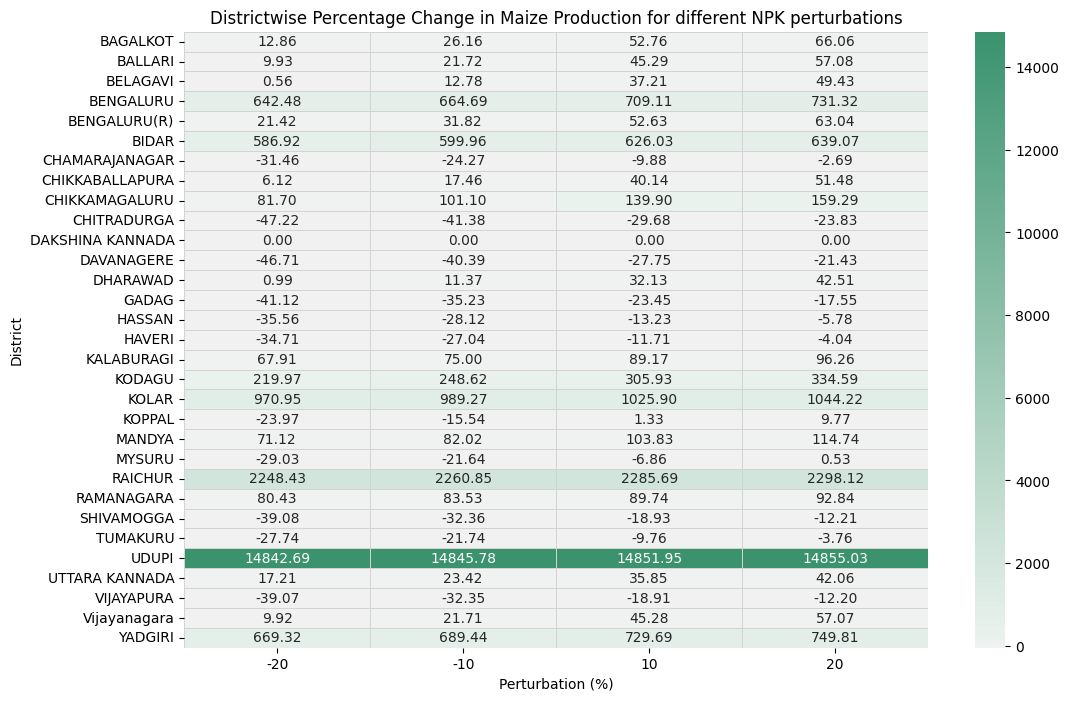

In [ ]:

def plot_heatmap(impact_df):
    cmap = sns.diverging_palette(10, 150, s=80, l=55, as_cmap=True)

    plt.figure(figsize=(12, 8))
    sns.heatmap(impact_df, annot=True, fmt=".2f", cmap=cmap, center=0, linewidths=0.5, linecolor='lightgrey')
    plt.title('Districtwise Percentage Change in Maize Production for different NPK perturbations')
    plt.xlabel('Perturbation (%)')
    plt.ylabel('District')

    plt.show()

# Prepare data for heatmap
pivot_df = results_df.pivot(index="District", columns="Perturbation (%)", values="Percentage Change")
# Plot the heatmap
plot_heatmap(pivot_df)



Outcome: The  green most District 'Udupi' shows highest positive impact on perturbating NPK_maize by +20%

In [ ]:
# (b.)GRID PLOT ,31 DISTRICT GRID PLOT ANALYSIS

In [ ]:
# The plot_districtwise_results function visualizes the impact of perturbations on the specified capability vector (in this case, Maize Production) for each district.
# It generates a series of line plots, one for each district, showing how the percentage change in Maize Production varies with different perturbation percentages.

Slope: 14.54850618525749
Intercept: 17171.95235633351


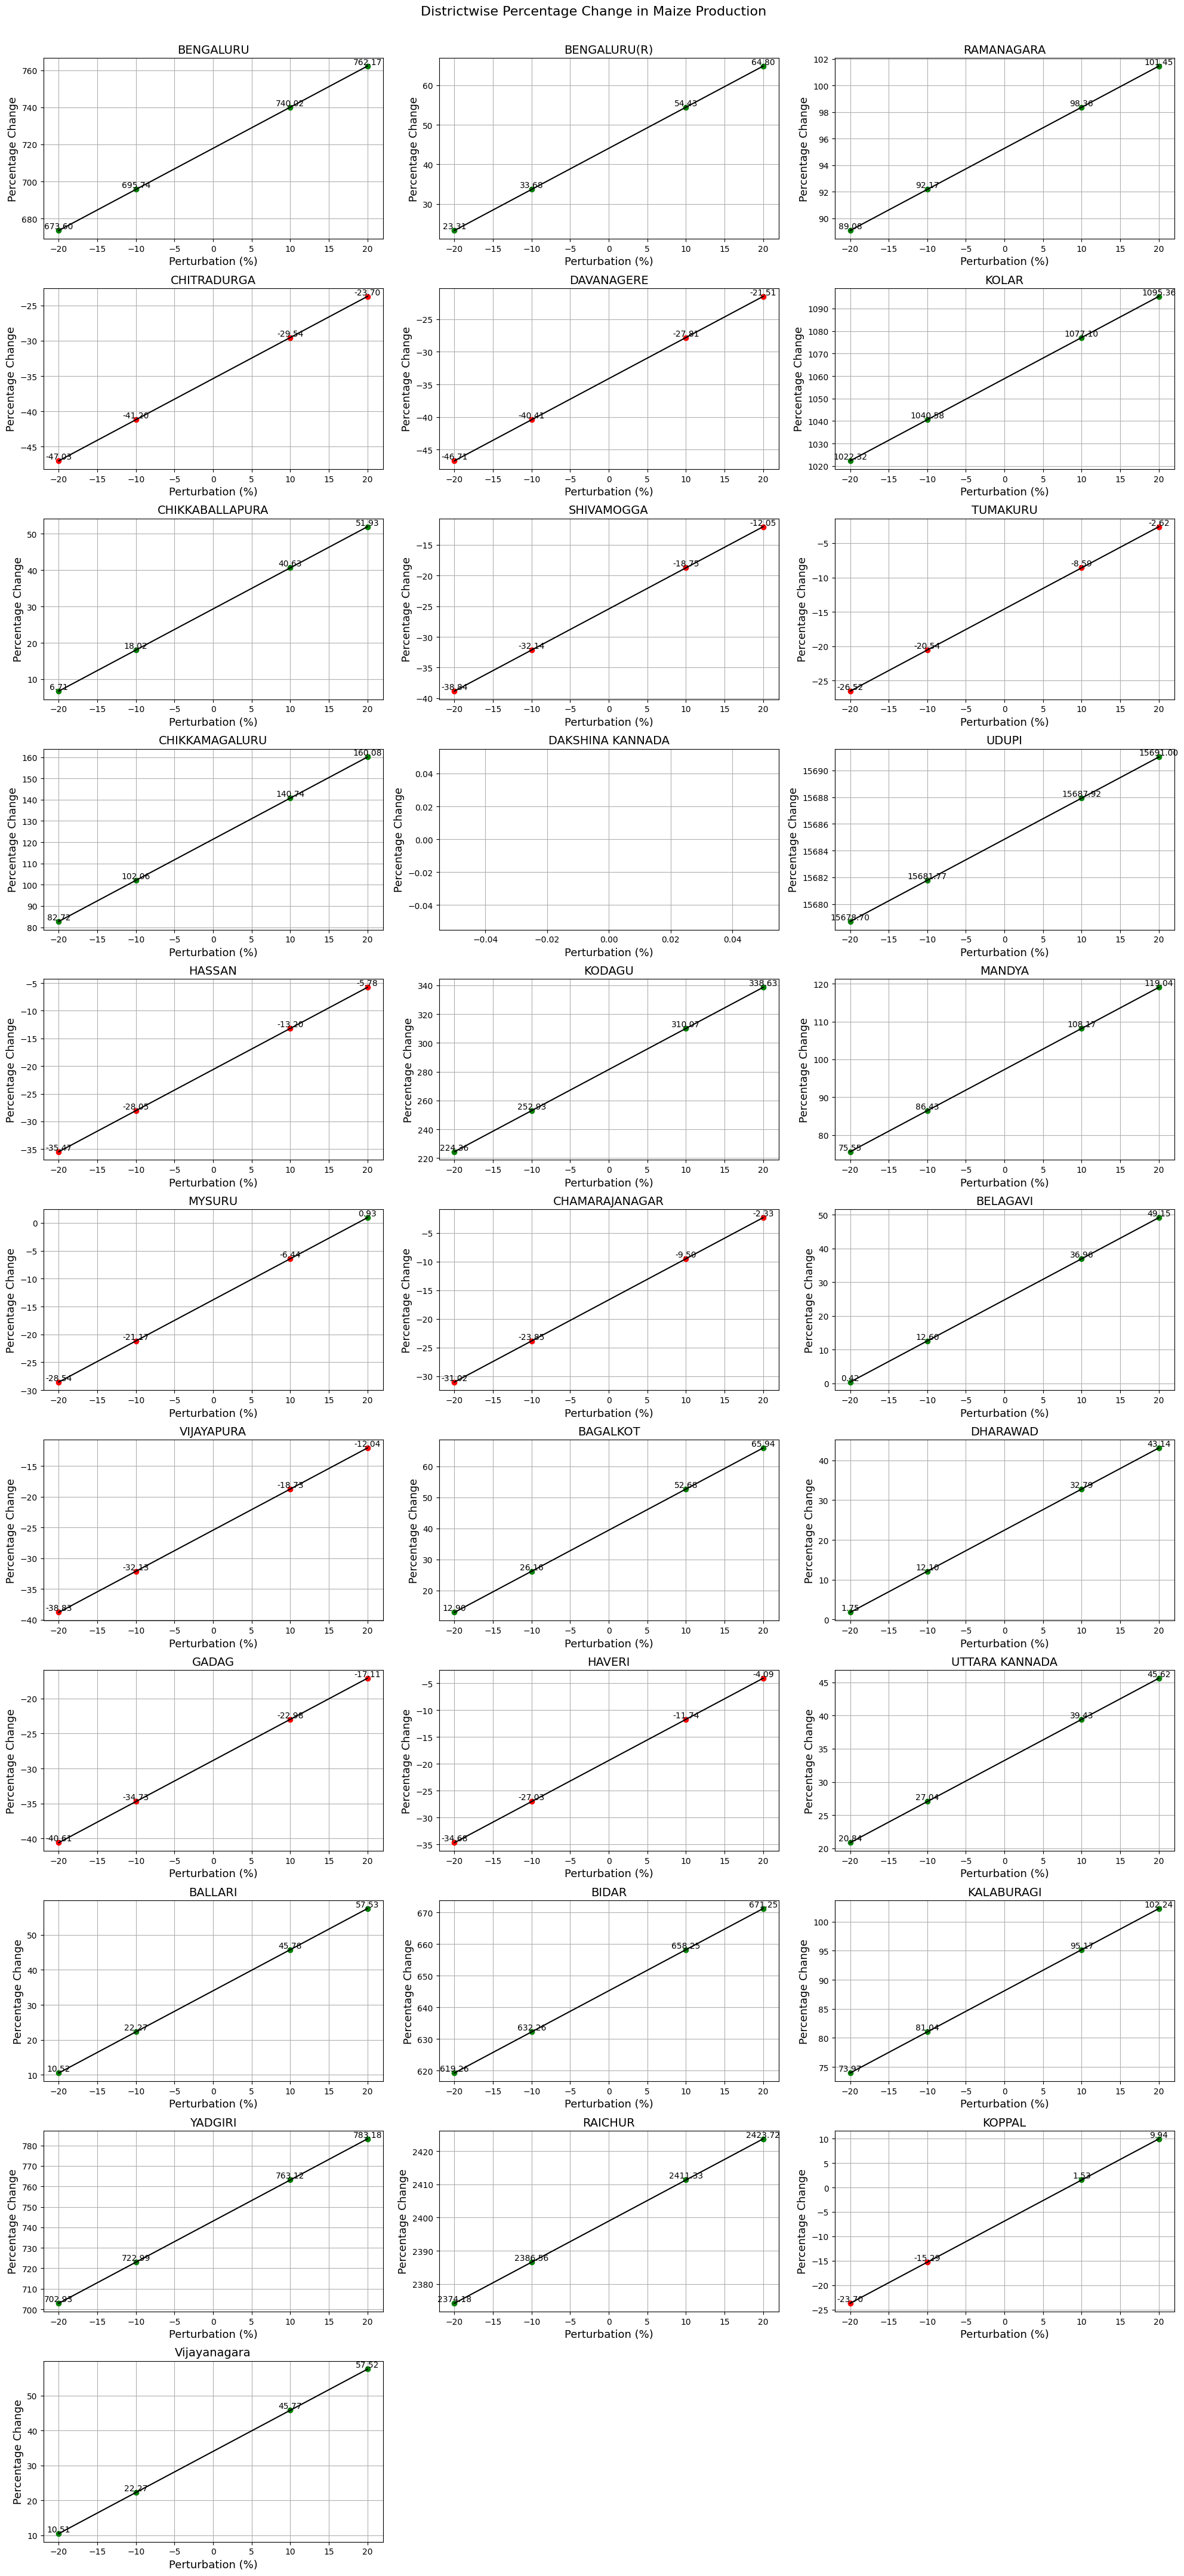

In [ ]:
def perform_analysis(data, factor, Capability, perturbations):
    # Initialize slopes and intercepts
    m = None
    c = None

    # Filter data based on non-zero capability vectors
    filtered_data = data[(data[Capability] != 0) & (~data[Capability].isnull())]

    # Extract features and target
    x = filtered_data[[factor]]
    y = filtered_data[Capability]

    # If the target data is empty, set slope and intercept as NaN
    if y.empty:
        m = np.nan
        c = np.nan
    else:
        # Add a constant to features
        x_with_const = sm.add_constant(x)

        # Fit OLS model
        model = sm.OLS(y, x_with_const).fit()

        # Get slope and intercept
        m = model.params[factor]
        c = model.params['const']

    print("Slope:", m)
    print("Intercept:", c)

    # Initialize an empty list to store the results
    results = []

    # Iterate over unique values in the 'District' column of the original data
    for district_name in data['District'].unique():
        # Filter data for the current district
        district_data = data[data['District'] == district_name]

        # Check if all values of Capability for this district are zero
        if (district_data[Capability] == 0).all():
            # If all values are zero, calculate results for each perturbation
            for p in perturbations:
                results.append({
                    'District': district_name,
                    'Perturbation (%)': p,
                    f'{Capability} (old)': 0,
                    f'{Capability} (new)': 0,
                    f'Change in {Capability}': 0,
                    'Percentage Change(%)': 0,
                })
        else:
            # If not all values are zero, calculate results for each perturbation
            for p in perturbations:
                perturbation_ratio = p / 100.0
                perturbed_factor_value = district_data[factor] * (1 + perturbation_ratio)

                cv_new = m * perturbed_factor_value + c
                cv_old =  district_data[Capability]

                percent_change = np.where(cv_old != 0, ((cv_new - cv_old) / cv_old)*100, 0)


                results.append({
                        'District': district_name,
                        'Perturbation (%)': p,
                        f'{Capability} (old)': cv_old.values[0],
                        f'{Capability} (new)': cv_new.values[0],
                        f'Change in {Capability}': cv_new.values[0] - cv_old.values[0],
                        'Percentage Change': percent_change[0],
                    })

    # Convert the results list to a DataFrame
    results_df = pd.DataFrame(results)

    # Return the DataFrame containing the results
    return results_df

results1_df = perform_analysis(df, factor, Capability, user_perturbations)


def generate_colors(impacts):
    return ['green' if impact > 0 else 'red' for impact in impacts]

def plot_districtwise_results(results1_df, user_perturbations):
    """
    Plot the impact of perturbations on the specified capability vector for each district in a single figure using seaborn line plots.

    Parameters:
    - results_df: DataFrame containing the analysis results including the district, perturbations, and their impacts.
    - user_perturbations: list, a list of perturbation percentages used in the analysis.
    """

    # Iterate over unique districts
    unique_districts = results1_df['District'].unique()
    num_districts = len(unique_districts)

    # Define subplot layout
    num_cols = 3
    num_rows = (num_districts + num_cols - 1) // num_cols

    # Set figure size (reduce the height)
    plt.figure(figsize=(20, 4 * num_rows))

    # Iterate over districts
    for i, district in enumerate(unique_districts, start=1):
        plt.subplot(num_rows, num_cols, i)

        # Filter data for the current district
        district_data = results1_df[results_df['District'] == district]

        # Plot each line separately with color coding
        for _, row in district_data.iterrows():
            if row['Percentage Change'] != 0:
                color = 'green' if row['Percentage Change'] > 0 else 'red'
                plt.plot(row['Perturbation (%)'], row['Percentage Change'], marker='o', color=color)
            elif row['Percentage Change'] == 0 or np.isnan(row['Percentage Change']):
                plt.axhline(y=0, color='black', linestyle='-')  # Plot a horizontal line at y=0

            # Show values of Percentage Change on the plot
            plt.text(row['Perturbation (%)'], row['Percentage Change'], f'{row["Percentage Change"]:.2f}', ha='center', va='bottom')

        # Connect the dots with a black line (excluding zero values)
        plt.plot(district_data[district_data['Percentage Change'] != 0]['Perturbation (%)'], district_data[district_data['Percentage Change'] != 0]['Percentage Change'], color='black')

        # Display gridlines
        plt.grid(True)

        # Set title and labels
        plt.title(f'{district}', fontsize=14)
        plt.xlabel('Perturbation (%)', fontsize=13)
        plt.ylabel('Percentage Change', fontsize=13)

    plt.tight_layout()
    plt.subplots_adjust(top=0.96)  # Adjust space between super title and subplots
    plt.suptitle(f'Districtwise Percentage Change in Maize Production', fontsize=16, y=0.98)  # Increase super title font size and adjust position

    plt.show()



plot_districtwise_results(results1_df, user_perturbations)

Outcome: All 31 districts can be studied together for better analysis

In [ ]:
# (d.)Tableau Visualisation

For tableau Visualisation ,You have to download results_df into your local machine and save it as 'resultsmaize.csv'


In [ ]:
# Save the DataFrame to a CSV file in Google Colab
results_df.to_csv('resultsmaize.csv', index=False)

# Download the file to your local machine
from google.colab import files
files.download('resultsmaize.csv')

**EXPERIMENT 2:**

** Perturbating One Factor to Study Impact Analysis on SDG Capability (Rice Production)**


The  experiment hones in on Rice Production, a crucial component of SDG 2. They have identified five key factors from the dataset that significantly impact Maize production. Our approach involves perturbating these factors individually to observe their isolated effects on production levels across various districts. By visualizing these impacts comprehensively, we aim to unravel the intricate dynamics of how each factor influences the overall stability and productivity of rice cultivation.
Factor chosen=TOTALNPK
Capability target=Rice Production

**1.Data Preprocessing:**

Import necessary libraries: pandas, statsmodels.api, seaborn, numpy, and matplotlib.pyplot.
Define a function remove_pattern to clean column names by removing trailing numbers.
Load the Kaggle 2016-17 Agriculture dataset and clean column names.

**2.Data Manipulation:**
Create new columns for Total Production and FCR (TotalNPK / Total Production) as TOTALNPK is for all crops and we need a prportion for Rice Production and Maize Production.
Calculate NPK_Rice and NPK_Maize based on TotalNPK and respective production values.

**3.Perturbation Design:**
Select the perturbation levels (user_perturbations) for NPK_Rice.
**4.Linear Regression Analysis:**
Implement a function perform_analysis that takes the dataset, factor (TotalNPK), Capability (Rice Production), and perturbations as input.
Fit a simple linear regression model between TotalNPK and Rice Production.
Calculate the slope and intercept of the regression line.

**5.Impact Analysis:**
For each district, calculate the impact of perturbations on Rice Production using the regression equation.
Store the results in a DataFrame with columns for District, Perturbation (%), Rice Production (old), Rice Production (new), Change in Rice Production, and Percentage Change.

**6.Visualization:**
Define a function plot_heatmap to plot a heatmap showing the percentage change in Rice Production for different NPK perturbations across districts.
Use seaborn and matplotlib to create the heatmap.

In [ ]:
####(B.)EXPERIMENT2

In [ ]:

#####(a.)IMPORTING NECESSARY LIBRARIES




import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


######(b.)Performing Impact analysis as Percentage Change in Capability on perturbating factor(one only here)
######Applying SIMPLE LINEAR REGRESSION(STATSMODEL)





def perform_analysis(data, factor, Capability, perturbations):
    # Initialize slopes and intercepts
    m = None
    c = None

    # Extract features and target
    x = data[[factor]]
    y = data[Capability]

    # If the target data is empty, set slope and intercept as NaN
    if y.empty:
        m = np.nan
        c = np.nan
    else:
        # Add a constant to features
        x_with_const = sm.add_constant(x)

        # Fit OLS model between 'factor' and 'capability'
        #Simple Linear Regression
        model = sm.OLS(y, x_with_const).fit()

        # Get slope and intercept
        m = model.params[factor]
        c = model.params['const']

    print("Slope:", m)
    print("Intercept:", c)

    # Initialize an empty list to store the results
    results = []

    # Iterate over unique values in the 'District' column of the original data
    for district_name in data['District'].unique():
        # Filter data for the current district
        district_data = data[data['District'] == district_name]



     ### TREATING ZERO OR ABSENCE OF CROP AT PARTICULAR DISTRICT AS '0' PERCENTAGE CHANGE
     ### HENCE,NEED TO SEPERATE CAPABILITY VALUES AS ZEROS AND NON ZEROS TO HANDLE DIFFERNTLY


        # Check if all values of Capability for this district are zero
        #If value is already zero for that crop in that particular district,Simply set the percentage change as '0' showing absence of crop .
        if (district_data[Capability] == 0).all():
            # If all values are zero, calculate results for each perturbation
            for p in perturbations:
                results.append({
                    'District': district_name,
                    'Perturbation (%)': p,
                    f'{Capability} (old)': 0,
                    f'{Capability} (new)': 0,
                    f'Change in {Capability}': 0,
                    'Percentage Change': 0,
                })
        else:

            # If not all values are zero, calculate results for each perturbation
            # Formula used:
            # New Capability value= m* Perturbed Value +c
            # Percentage change= ((New Capability value)-(Old Capability Value))/Old Capability Value
            # Example:
              # You can perform this by taking the example formula below for (NPK_Rice+10%) i.e. there has
              # been an increase in NPK_Rice values by 10%:
              # (based on y=mx+c)
              # Rice_Production_old = {the original Capability values from the dataset}
              # Rice_Production_new = m*(1.1*NPK_Rice) + c
              # Change in Rice_Production = Rice_Production_new - Rice_Production_old
              # Predicted Change in Rice_Production = m*0.1*NPK_Rice
              # Percentage Change in Rice Production = Predicted Change in Rice Production/Rice_Production_old

            for p in perturbations:
                perturbation_ratio = p / 100.0
                perturbed_factor_value = district_data[factor] * (1 + perturbation_ratio)

                cv_new = m * perturbed_factor_value + c
                cv_old =  district_data[Capability]

                percent_change = np.where(cv_old != 0, ((cv_new - cv_old) / cv_old)*100, 0)


                results.append({
                        'District': district_name,
                        'Perturbation (%)': p,
                        f'{Capability} (old)': cv_old.values[0],
                        f'{Capability} (new)': cv_new.values[0],
                        f'Change in {Capability}': cv_new.values[0] - cv_old.values[0],
                        'Percentage Change': percent_change[0],
                    })

    # Convert the results list to a DataFrame
    results_df = pd.DataFrame(results)

    # Return the DataFrame containing the results
    return results_df




# Example usage
file_path = '/content/Agriculture_KAG_2016_17(AgricultureIndicatorsandFactors).csv'
factor = 'NPK_Rice'
Capability = 'Rice_Production'
user_perturbations = [-20, -10, 10, 20]


# Read the dataset
df = pd.read_csv(file_path)






#  (C.) DATA PREPROCESSING
# Define a function to clean column names by removing trailing numbers





import re

def remove_pattern(col_name):
    return re.sub(r'_[0-9]{3}$', '', col_name)

# Clean column names
df.columns = map(remove_pattern, df.columns)


# Calculate additional columns based on proportionality to crops choosen(capabilities)
df['Total_Production'] = df['TotalCerealsandMinorMillets_Production'] + df['TotalOilSeeds_Production'] + df['TotalFoodGrains'] + df['TotalGourdVarietyVegetables']
df['FCR'] = df['TotalNPK']/df['Total_Production']
df['NPK_Rice'] = df['TotalNPK']*df['Rice_Production']/df['Total_Production']
df['NPK_Maize'] = df['TotalNPK']*df['Maize_Production']/df['Total_Production']


###  ADDING 31ST DISTRICT AS 'VIJAYNAGARA' BY SPLITTING DISTRICT 'BALLARI'

vijayanagara_values = df[df['District'] == 'BALLARI'].iloc[0].copy()
vijayanagara_values['District'] = 'Vijayanagara'
vijayanagara_values[['TotalNPK', 'Rice_Production', 'Jowar_Production', 'Maize_Production', 'Jowar_Yield','Total_Production','FCR','NPK_Rice','NPK_Maize']] = (vijayanagara_values[['TotalNPK', 'Rice_Production', 'Jowar_Production', 'Maize_Production', 'Jowar_Yield','Total_Production','FCR','NPK_Rice','NPK_Maize']].astype(float) / 2).round().astype(int)
df = pd.concat([df, pd.DataFrame([vijayanagara_values], columns=df.columns)], ignore_index=True)

df.loc[df['District'] == 'BALLARI', ['TotalNPK', 'Rice_Production', 'Jowar_Production', 'Maize_Production', 'Jowar_Yield','Total_Production','FCR','NPK_Rice','NPK_Maize']] /= 2
df.loc[df['District'] == 'BALLARI', ['TotalNPK', 'Rice_Production', 'Jowar_Production', 'Maize_Production', 'Jowar_Yield','Total_Production','FCR','NPK_Rice','NPK_Maize']] = df.loc[df['District'] == 'BALLARI', ['TotalNPK', 'Rice_Production', 'Jowar_Production', 'Maize_Production', 'Jowar_Yield','Total_Production','FCR','NPK_Rice','NPK_Maize']].applymap(lambda x: x + 0.5 if x % 1 != 0 else x)


#Calling Perform Analysis fuction
results_df = perform_analysis(df, factor, Capability, user_perturbations)

results_df




# sorted_df = results_df.sort_values(by='District')

# # print(sorted_df)


#(d.)Displaying district-wise perturbations impact as Percentage Change



for district_name in results_df['District'].unique():
    district_table = results_df[results_df['District'] == district_name].reset_index(drop=True)
    print(f"Table for {district_name}:")
    print(district_table.head(4).to_string(index=False))
    print()






Slope: 11.982168777264253
Intercept: 21969.6804651068
Table for BENGALURU:
 District  Perturbation (%)  Rice_Production (old)  Rice_Production (new)  Change in Rice_Production  Percentage Change
BENGALURU               -20                 3376.0           26895.051493               23519.051493         696.654369
BENGALURU               -10                 3376.0           27510.722872               24134.722872         714.891080
BENGALURU                10                 3376.0           28742.065629               25366.065629         751.364503
BENGALURU                20                 3376.0           29357.737007               25981.737007         769.601215

Table for BENGALURU(R):
    District  Perturbation (%)  Rice_Production (old)  Rice_Production (new)  Change in Rice_Production  Percentage Change
BENGALURU(R)               -20                 2354.0           23578.505702               21224.505702         901.635756
BENGALURU(R)               -10                 2354.0 

*After getting the results of perturbation impacts on capability(Rice_Production),we'll visualise them. (a.)By Heatmap (b.)31 district Grid Plot (c.)Tableau P1(NPK_maize-20%),P2(NPK_Maize-10%),P3(NPK_Maize+10%),P4(NPK_Maize+20%) Dashboard

In [ ]:
# (a.)HEATMAP ANALYSIS
# This plot_heatmap function creates a heatmap using Seaborn to visualize the percentage change in Rice Production for different NPK perturbations across districts.

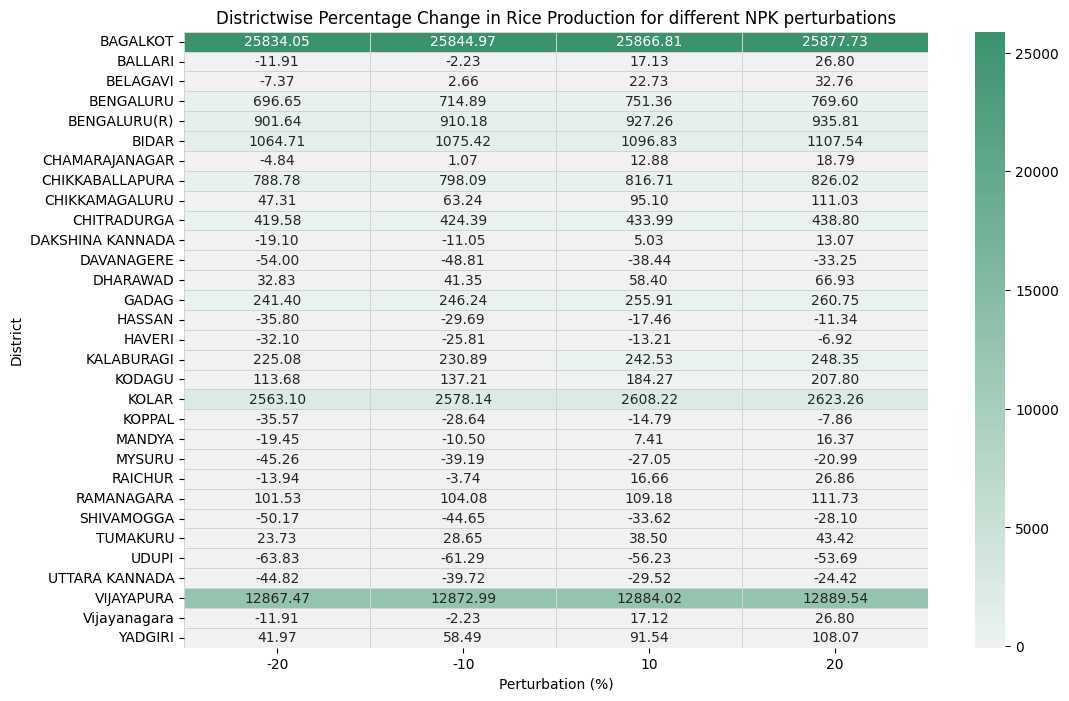

In [ ]:

def plot_heatmap(impact_df):
    cmap = sns.diverging_palette(10, 150, s=80, l=55, as_cmap=True)

    plt.figure(figsize=(12, 8))
    sns.heatmap(impact_df, annot=True, fmt=".2f", cmap=cmap, center=0, linewidths=0.5, linecolor='lightgrey')
    plt.title('Districtwise Percentage Change in Rice Production for different NPK perturbations')
    plt.xlabel('Perturbation (%)')
    plt.ylabel('District')

    plt.show()

# Prepare data for heatmap
pivot_df = results_df.pivot(index="District", columns="Perturbation (%)", values="Percentage Change")
# Plot the heatmap
plot_heatmap(pivot_df)



**Outcome: District 'Bagalkot' and 'Vijaypura' were highly impacted on perturbating NPK_Rice+20%**

In [ ]:
# (b.)GRID PLOT ,31 DISTRICT GRID PLOT ANALYSIS

In [ ]:
# The plot_districtwise_results function visualizes the impact of perturbations on the specified capability vector (in this case, Rice Production) for each district.
# It generates a series of line plots, one for each district, showing how the percentage change in Rice Production varies with different perturbation percentages.

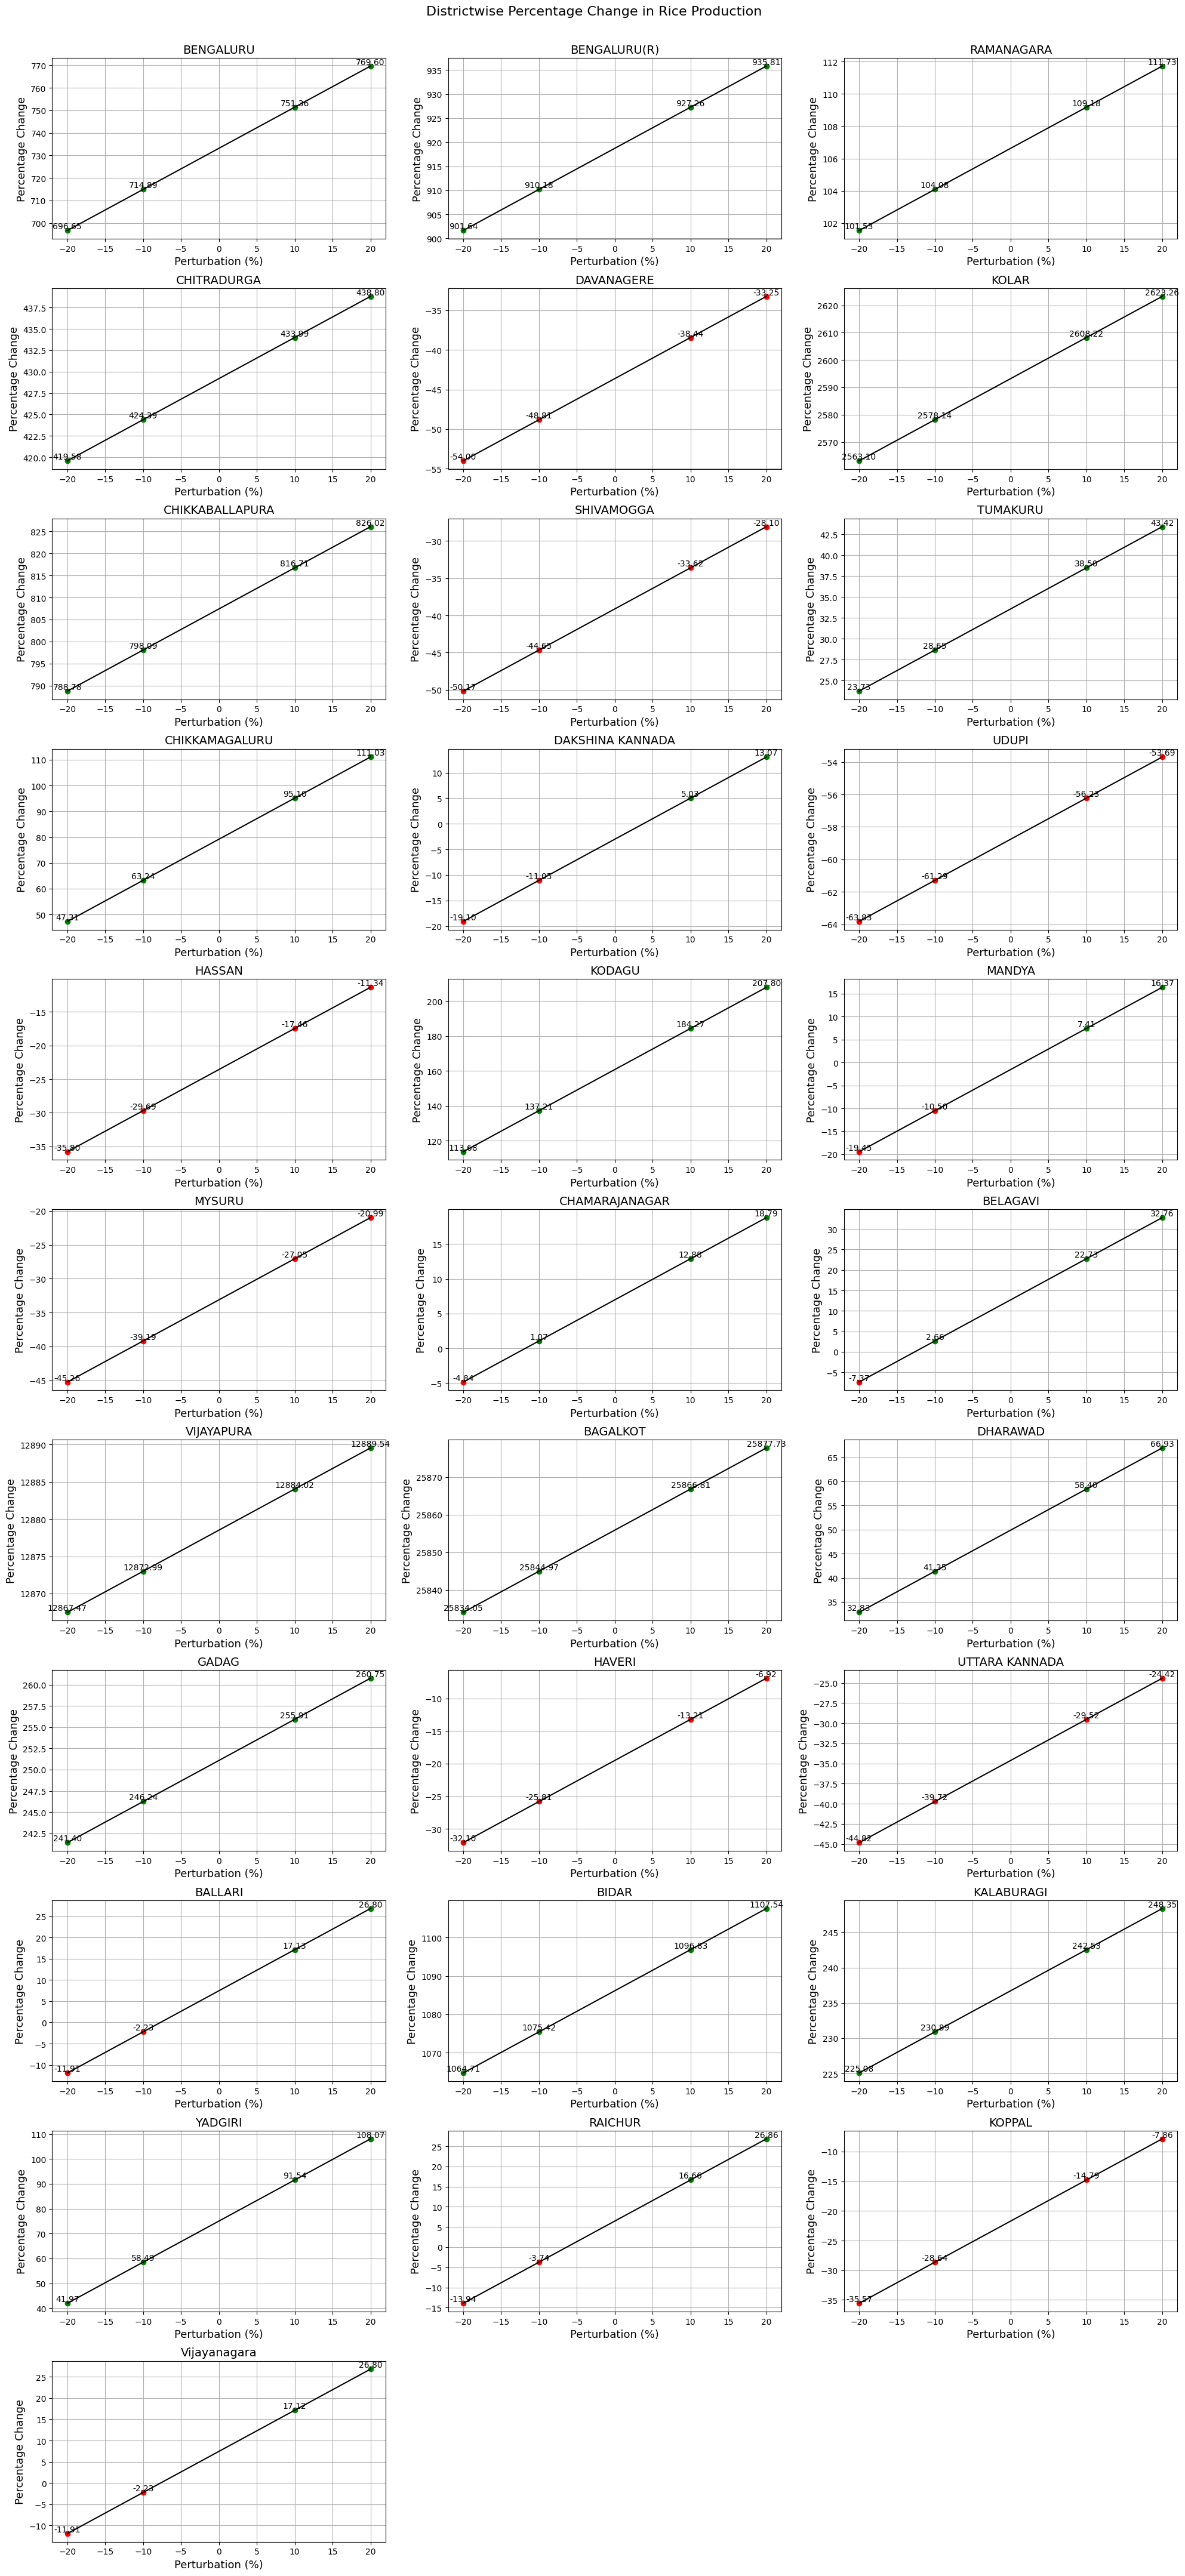

In [ ]:



def generate_colors(impacts):
    return ['green' if impact > 0 else 'red' for impact in impacts]

def plot_districtwise_results(results_df, user_perturbations):
    """
    Plot the impact of perturbations on the specified capability vector for each district in a single figure using seaborn line plots.

    Parameters:
    - results_df: DataFrame containing the analysis results including the district, perturbations, and their impacts.
    - user_perturbations: list, a list of perturbation percentages used in the analysis.
    """

    # Iterate over unique districts
    unique_districts = results_df['District'].unique()
    num_districts = len(unique_districts)

    # Define subplot layout
    num_cols = 3
    num_rows = (num_districts + num_cols - 1) // num_cols

    # Set figure size (reduce the height)
    plt.figure(figsize=(20, 4 * num_rows))

    # Iterate over districts
    for i, district in enumerate(unique_districts, start=1):
        plt.subplot(num_rows, num_cols, i)

        # Filter data for the current district
        district_data = results_df[results_df['District'] == district]

        # Plot each line separately with color coding
        for _, row in district_data.iterrows():
            if row['Percentage Change'] != 0:
                color = 'green' if row['Percentage Change'] > 0 else 'red'
                plt.plot(row['Perturbation (%)'], row['Percentage Change'], marker='o', color=color)
            elif row['Percentage Change'] == 0 or np.isnan(row['Percentage Change']):
                plt.axhline(y=0, color='black', linestyle='-')  # Plot a horizontal line at y=0

            # Show values of Percentage Change on the plot
            plt.text(row['Perturbation (%)'], row['Percentage Change'], f'{row["Percentage Change"]:.2f}', ha='center', va='bottom')

        # Connect the dots with a black line (excluding zero values)
        plt.plot(district_data[district_data['Percentage Change'] != 0]['Perturbation (%)'], district_data[district_data['Percentage Change'] != 0]['Percentage Change'], color='black')

        # Display gridlines
        plt.grid(True)

        # Set title and labels
        plt.title(f'{district}', fontsize=14)
        plt.xlabel('Perturbation (%)', fontsize=13)
        plt.ylabel('Percentage Change', fontsize=13)

    plt.tight_layout()
    plt.subplots_adjust(top=0.96)  # Adjust space between super title and subplots
    plt.suptitle(f'Districtwise Percentage Change in Rice Production', fontsize=16, y=0.98)  # Increase super title font size and adjust position

    plt.show()



plot_districtwise_results(results_df, user_perturbations)

**Outcome: All 31 districts can be studied together for better analysis**

In [ ]:
# (d.)Tableau Visualisation

For tableau Visualisation ,You have to download results_df into your local machine and save it as 'resultsRice.csv'


In [ ]:
# Save the DataFrame to a CSV file in Google Colab
results_df.to_csv('resultsRice.csv', index=False)

# Download the file to your local machine
from google.colab import files
files.download('resultsRice.csv')

        **PART B: MULTIPLE FACTOR ANALYSIS**

EXPERIMENT1: MAIZE CASE FILE

I RECEIVED A MAIZE CASE FILE TO CONSIDER WHERE IT HAS COLUMNS AS FACRORS THAT CORRELATED VERY WELL WITH MAIZE PRODUCTION WHICH WAS BROUGHT OUT BY CORELATION ANAYSIS AND P-VALUE.
FACTORS WERE:
  #1. NPK_Maize(which is perturbed)
  #2.NetAreaIrrigated_Wells_NetAreaIrrigated_Maize
  #3.NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_Maize
  #4.NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_No_Maize
  #5.MotorVehicles_Tractors_Maize
  #6.TotalAgricultureLoan_Maize
  #7.AreaUnderCereals_Maize

MY WORK:
** Perturbating One Factor in presence of other factors as well  to Study Impact Analysis on SDG Capability (Maize Production)**

The experiment hones in on Maize Production, a crucial component of SDG 2. They have identified seven key factors from the dataset that significantly impact Maize production. Our approach involves perturbating a single  factor in presence of other factors(regressing with all factors but perturbating one factor) to observe the effects  on production levels across various districts. By visualizing these impacts comprehensively, we aim to unravel the intricate dynamics of how each factor influences the overall stability and productivity of rice cultivation. Factor chosen=TOTALNPK, Capability target=Maize Production

1.Data Preprocessing:

Import necessary libraries: pandas, statsmodels.api, seaborn, numpy, and matplotlib.pyplot. Define a function remove_pattern to clean column names by removing trailing numbers. Load the Kaggle 2016-17 Agriculture dataset and clean column names.

2.Data Manipulation: Create new columns for Total Production and FCR (TotalNPK / Total Production) as TOTALNPK is for all crops and we need a prportion for Rice Production and Maize Production. Calculate NPK_Rice and NPK_Maize based on TotalNPK and respective production values.

3.Perturbation Design: Select the perturbation levels (user_perturbations) for NPK_Maize.

4.MULTIPLE Regression Analysis: Implement a function perform_analysis that takes the dataset, factor (TotalNPK,NetAreaIrrigated_Wells_NetAreaIrrigated_Maize,NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_Maize,NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_No_Maize,MotorVehicles_Tractors_Maize,TotalAgricultureLoan_Maize,,AreaUnderCereals_Maize), Capability (Maize Production), and perturbations as input. Fit a multiple linear regression model between TotalNPK and Rice Production. Calculate the slope and intercept of the regression line.

5.Impact Analysis: For each district, calculate the impact of perturbations on Maize Production using the regression equation. Store the results in a DataFrame with columns for District, Perturbation (%), Maize Production (old), Maize Production (new), Change in Maize Production, and Percentage Change.

6.Visualization: Define a function plot_heatmap to plot a heatmap showing the percentage change in Maize Production for different NPK perturbations across districts. Use seaborn and matplotlib to create the heatmap.

In [ ]:

#####(a.)IMPORTING NECESSARY LIBRARIES


import numpy as np   # numerical computation
import pandas as pd  # pandas for data manipulation
import statsmodels.api as sm  # statsmodels for linear regression
import seaborn as sns
import matplotlib.pyplot as plt


######(b.)Performing Impact analysis as Percentage Change in Capability on perturbating factor(TOTALNPK) but in presence of other factors as well
######Applying MULTIPLE LINEAR REGRESSION(STATSMODEL)


def perform_analysis(df, factor1, factor2, factor3,factor4,factor5,factor6,factor7, Capability, perturbations):

    data=df


    # Extract columns 'factor1', 'factor2', 'factor3','factor4','factor5' ,'factor6','factor7' and 'Capability' from the data
    x = df[[factor1, factor2, factor3,factor4,factor5,factor6,factor7]]
    y = df[Capability]

    # Add a constant column to the x matrix
    X_with_const = sm.add_constant(x)

    # Fit an Ordinary Least Squares (OLS) regression model
    #MULTIPLE LINEAR REGRESSION BETWEEN CAPABILITY 'MAIZE PRODUCTION' AND CORELATING FACTORS
    model = sm.OLS(y, X_with_const).fit()


    # Get the coefficients for the independent variables and the constant term
    m1 = model.params[factor1]
    m2 = model.params[factor2]
    m3 = model.params[factor3]
    m4 = model.params[factor4]
    m5 = model.params[factor5]
    m6 = model.params[factor6]
    m7 = model.params[factor7]
    c = model.params['const']

    print(m1)
    print(m2)
    print(m3)
    print(m4)
    print(m5)
    print(m6)
    print(m7)
    print(c)
    # Initialize an empty list to store the results
    results = []

    # Iterate over unique values in the 'District' column of the original data
    for district_name in data['District'].unique():
        # Filter data for the current district
        district_data = data[data['District'] == district_name]

        # Check if all values of Capability for this district are zero
        if (district_data[Capability] == 0).all():
            # If all values are zero, calculate results for each perturbation
            for p in perturbations:
                results.append({
                    'District': district_name,
                    'Perturbation (%)': p,
                    f'{Capability} (old)': 0,
                    f'{Capability} (new)': 0,
                    f'Change in {Capability}': 0,
                    'Percentage Change': 0,
                })
        else:
            # If not all values are zero, calculate results for each perturbation
            # Formula used:
            # New Capability value= m1* Perturbed Value +c + m2* old Capability value +...
            # Percentage change= ((New Capability value)-(Old Capability Value))/Old Capability Value
            # Example:
              # You can perform this by taking the example formula below for (NPK_Rice+10%) i.e. there has
              # been an increase in NPK_Rice values by 10%:
              # (based on y=mx+c)
              # Rice_Production_old = {the original Capability values from the dataset}
              # Rice_Production_new = m*(1.1*NPK_Rice) + c+m2* old Capability vlue +...
              # Change in Rice_Production = Rice_Production_new - Rice_Production_old
              # Predicted Change in Rice_Production = m*0.1*NPK_Rice
              # Percentage Change in Rice Production = Predicted Change in Rice Production/Rice_Production_old
            for p in perturbations:
                perturbation_ratio = p / 100.0

                #NOTE: WE ARE PERTURBATING ONLY ONE FACTOR AGAIN BUT UNLIKE LAST TIME ,THIS TIME OTHER FACTORS TOO PLAYED A ROLE(WHILE REGRESSING )
                perturbed_factor1_value = district_data[factor1] * (1 + perturbation_ratio)


                # Calculate cv_new and cv_old using non-zero values of other factors
                cv_new = m1 * perturbed_factor1_value + m2*district_data[factor2] + m3*district_data[factor3] +m4*district_data[factor4]+m5*district_data[factor5] +m6*district_data[factor6]+m7*district_data[factor7]+c
                cv_old =district_data[Capability]

                percent_change = np.where(cv_old != 0, ((cv_new - cv_old) / cv_old)*100, 0)

                results.append({
                    'District': district_name,
                    'Perturbation (%)': p,
                    f'{Capability} (old)': cv_old.values[0],
                    f'{Capability} (new)': cv_new.values[0],
                    f'Change in {Capability}': cv_new.values[0] - cv_old.values[0],
                    'Percentage Change': percent_change[0],
                })

    # Convert the results list to a DataFrame
    results_df = pd.DataFrame(results)

    # Return the DataFrame containing the results
    return results_df



file_path = '/content/Agriculture_KAG_2016_17(AgricultureIndicatorsandFactors).csv'  # Path to the CSV file
df = pd.read_csv(file_path)


#  (C.) DATA PREPROCESSING
# Define a function to clean column names by removing trailing numbers


import re

def remove_pattern(col_name):
    return re.sub(r'_[0-9]{3}$', '', col_name)

# Clean column names
df.columns = map(remove_pattern, df.columns)



# Calculate additional columns based on proportionality to crops choosen(capabilities)
#NOTE: THERE ARE 7 total factors correlating with Maize Production:
       #1.NPK_Maize(which is perturbed)
       #2.NetAreaIrrigated_Wells_NetAreaIrrigated_Maize
       #3.NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_Maize
       #4.NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_No_Maize
       #5.MotorVehicles_Tractors_Maize
       #6.TotalAgricultureLoan_Maize
       #7.AreaUnderCereals_Maize


    #BUT THESE ABOVE FACTORS ARE FOR EVERY CROP TYPE,IF WE ARE FOCUSING ON MAIZE PRODUCTION WE HAVE BRING OUT PROPORTIONALITY CORRESPONDING TO EACH FACTOR

df['Total_Production'] = df['TotalCerealsandMinorMillets_Production'] + df['TotalOilSeeds_Production'] + df['TotalFoodGrains'] + df['TotalGourdVarietyVegetables']
df['FCR'] = df['TotalNPK']/df['Total_Production']
df['NPK_Rice'] = df['TotalNPK']*df['Rice_Production']/df['Total_Production']
df['NPK_Maize'] = df['TotalNPK']*df['Maize_Production']/df['Total_Production']
df['NetAreaIrrigated_Wells_NetAreaIrrigated_Maize'] = df['NetAreaIrrigated_Wells_NetAreaIrrigated']*df['Maize_Production']/df['Total_Production']
df['NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_Maize'] = df['NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea']*df['Maize_Production']/df['Total_Production']
df['NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_No_Maize'] = df['NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_No']*df['Maize_Production']/df['Total_Production']
df['MotorVehicles_Tractors_Maize'] = df['MotorVehicles_Tractors']*df['Maize_Production']/df['Total_Production']
df['TotalAgricultureLoan_Maize'] = df['TotalAgricultureLoan']*df['Maize_Production']/df['Total_Production']




###  ADDING 31ST DISTRICT AS 'VIJAYNAGARA' BY SPLITTING DISTRICT 'BALLARI'

vijayanagara_values = df[df['District'] == 'BALLARI'].iloc[0].copy()
vijayanagara_values['District'] = 'Vijayanagara'
vijayanagara_values[['TotalNPK', 'Rice_Production', 'Jowar_Production', 'Maize_Production', 'Jowar_Yield','Total_Production','FCR','NPK_Rice','NPK_Maize','NetAreaIrrigated_Wells_NetAreaIrrigated_Maize','NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_Maize','NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_No_Maize','MotorVehicles_Tractors_Maize','TotalAgricultureLoan_Maize','NetAreaIrrigated_Wells_NetAreaIrrigated','NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea','NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_No','MotorVehicles_Tractors','TotalAgricultureLoan','AreaUnderCereals_Maize']] = (vijayanagara_values[['TotalNPK', 'Rice_Production', 'Jowar_Production', 'Maize_Production', 'Jowar_Yield','Total_Production','FCR','NPK_Rice','NPK_Maize','NetAreaIrrigated_Wells_NetAreaIrrigated_Maize','NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_Maize','NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_No_Maize','MotorVehicles_Tractors_Maize','TotalAgricultureLoan_Maize','NetAreaIrrigated_Wells_NetAreaIrrigated','NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea','NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_No','MotorVehicles_Tractors','TotalAgricultureLoan','AreaUnderCereals_Maize']].astype(float) / 2).round().astype(int)
df = pd.concat([df, pd.DataFrame([vijayanagara_values], columns=df.columns)], ignore_index=True)

df.loc[df['District'] == 'BALLARI', ['TotalNPK', 'Rice_Production', 'Jowar_Production', 'Maize_Production', 'Jowar_Yield','Total_Production','FCR','NPK_Rice','NPK_Maize','NetAreaIrrigated_Wells_NetAreaIrrigated_Maize','NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_Maize','NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_No_Maize','MotorVehicles_Tractors_Maize','TotalAgricultureLoan_Maize','NetAreaIrrigated_Wells_NetAreaIrrigated','NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea','NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_No','MotorVehicles_Tractors','TotalAgricultureLoan','AreaUnderCereals_Maize']] /= 2
df.loc[df['District'] == 'BALLARI', ['TotalNPK', 'Rice_Production', 'Jowar_Production', 'Maize_Production', 'Jowar_Yield','Total_Production','FCR','NPK_Rice','NPK_Maize','NetAreaIrrigated_Wells_NetAreaIrrigated_Maize','NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_Maize','NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_No_Maize','MotorVehicles_Tractors_Maize','TotalAgricultureLoan_Maize','NetAreaIrrigated_Wells_NetAreaIrrigated','NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea','NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_No','MotorVehicles_Tractors','TotalAgricultureLoan','AreaUnderCereals_Maize']] = df.loc[df['District'] == 'BALLARI', ['TotalNPK', 'Rice_Production', 'Jowar_Production', 'Maize_Production', 'Jowar_Yield','Total_Production','FCR','NPK_Rice','NPK_Maize','NetAreaIrrigated_Wells_NetAreaIrrigated_Maize','NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_Maize','NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_No_Maize','MotorVehicles_Tractors_Maize','TotalAgricultureLoan_Maize','NetAreaIrrigated_Wells_NetAreaIrrigated','NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea','NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_No','MotorVehicles_Tractors','TotalAgricultureLoan','AreaUnderCereals_Maize']].applymap(lambda x: x + 0.5 if x % 1 != 0 else x)



df['AreaUnderCereals_Maize']

# selected_columns = df.loc[:, ['TotalNPK', 'Rice_Production', 'Jowar_Production', 'Maize_Production', 'Jowar_Yield','Total_Production','FCR','NPK_Rice','NPK_Maize','NetAreaIrrigated_Wells_NetAreaIrrigated_Maize','NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_Maize','NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_No_Maize','AreaUnderCereals_Maize_Maize','MotorVehicles_Tractors_Maize','TotalAgricultureLoan_Maize','NetAreaIrrigated_Wells_NetAreaIrrigated','NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea','NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_No','AreaUnderCereals_Maize','MotorVehicles_Tractors','TotalAgricultureLoan']]
# selected_columns


# Example usage
factor1 = 'NPK_Maize'  # Factor 1 for linear regression
factor2 = 'NetAreaIrrigated_Wells_NetAreaIrrigated_Maize'  # Factor 2 for linear regression
factor3 = 'NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea_Maize'  # Factor 3 for linear regression
factor4 = 'NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_No_Maize'  # Factor 3 for linear regression
factor5 = 'AreaUnderCereals_Maize'  # Factor 3 for linear regression
factor6 = 'MotorVehicles_Tractors_Maize'  # Factor 3 for linear regression
factor7 = 'TotalAgricultureLoan_Maize'  # Factor 3 for linear regression
Capability = 'Maize_Production'  # Capability vector to analyze
user_perturbations = [-20,-10,10,20]  # Example perturbations in percentages
results_df = perform_analysis(df, factor1, factor2, factor3,factor4,factor5,factor6,factor7, Capability, user_perturbations)  # Performing the analysis



#(d.)Displaying district-wise perturbations impact as Percentage Change


# Displaying district-wise perturbations
for district_name in results_df['District'].unique():
    district_table = results_df[results_df['District'] == district_name].reset_index(drop=True)
    print(f"Table for {district_name}:")
    print(district_table.head(4).to_string(index=False))
    print()




4.941496776515743
0.7969983903788704
-0.9727001276453082
-28.875792350054983
2.191656859665917
10.81781084019914
0.013729139053515471
-5460.015435265497
Table for BENGALURU:
 District  Perturbation (%)  Maize_Production (old)  Maize_Production (new)  Change in Maize_Production  Percentage Change
BENGALURU               -20                    2879             1553.674132                -1325.325868         -46.034243
BENGALURU               -10                    2879             1770.200741                -1108.799259         -38.513347
BENGALURU                10                    2879             2203.253960                 -675.746040         -23.471554
BENGALURU                20                    2879             2419.780569                 -459.219431         -15.950658

Table for BENGALURU(R):
    District  Perturbation (%)  Maize_Production (old)  Maize_Production (new)  Change in Maize_Production  Percentage Change
BENGALURU(R)               -20                   42583      

In [ ]:
# (a.)HEATMAP ANALYSIS
# This plot_heatmap function creates a heatmap using Seaborn to visualize the percentage change in Maize Production for different NPK perturbations(Considering all correlating factors) across districts.

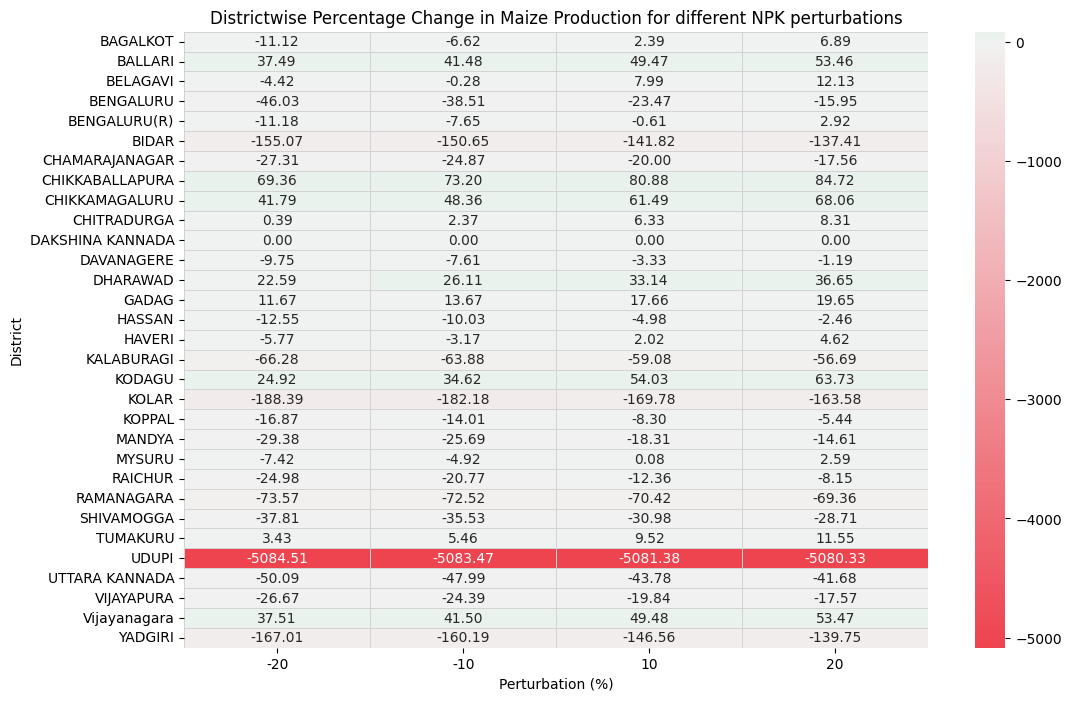

In [ ]:

def plot_heatmap(impact_df):
    cmap = sns.diverging_palette(10, 150, s=80, l=55, as_cmap=True)

    plt.figure(figsize=(12, 8))
    sns.heatmap(impact_df, annot=True, fmt=".2f", cmap=cmap, center=0, linewidths=0.5, linecolor='lightgrey')
    plt.title('Districtwise Percentage Change in Maize Production for different NPK perturbations')
    plt.xlabel('Perturbation (%)')
    plt.ylabel('District')

    plt.show()

# Prepare data for heatmap
pivot_df = results_df.pivot(index="District", columns="Perturbation (%)", values="Percentage Change")
# Plot the heatmap
plot_heatmap(pivot_df)



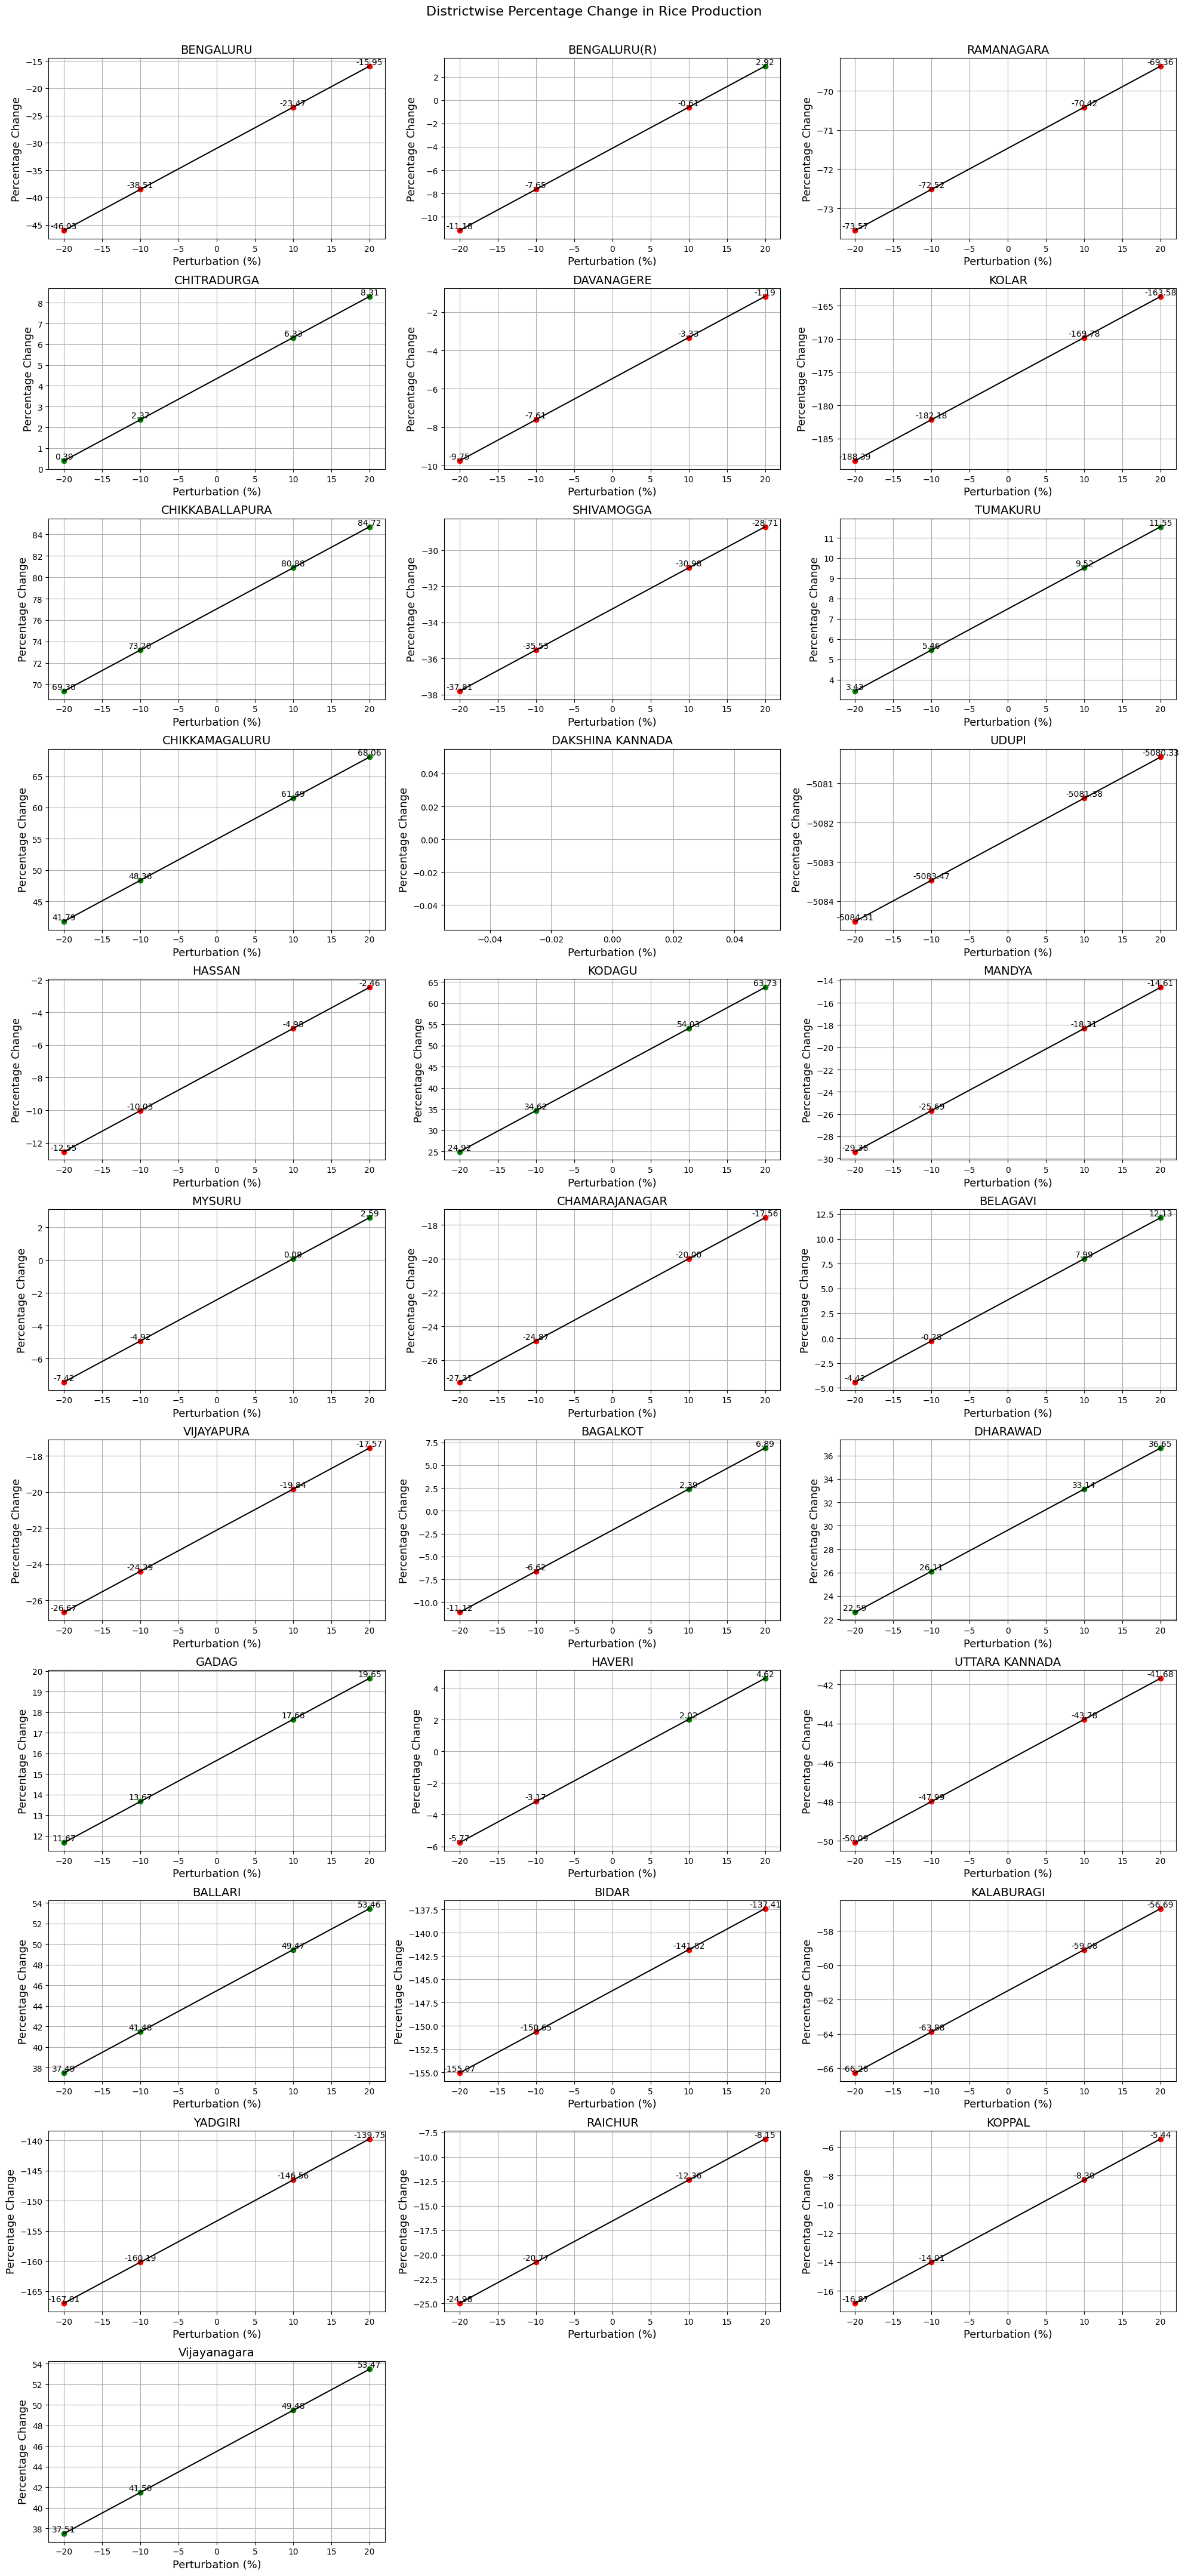

In [ ]:

def perform_analysis(df, factor1, factor2, factor3,factor4,factor5,factor6,factor7, Capability, perturbations):

    data=df


    # Extract columns 'factor1', 'factor2', 'factor3','factor4','factor5' ,'factor6','factor7' and 'Capability' from the data
    x = df[[factor1, factor2, factor3,factor4,factor5,factor6,factor7]]
    y = df[Capability]

    # Add a constant column to the x matrix
    X_with_const = sm.add_constant(x)

    # Fit an Ordinary Least Squares (OLS) regression model
    #MULTIPLE LINEAR REGRESSION BETWEEN CAPABILITY 'MAIZE PRODUCTION' AND CORELATING FACTORS
    model = sm.OLS(y, X_with_const).fit()


    # Get the coefficients for the independent variables and the constant term
    m1 = model.params[factor1]
    m2 = model.params[factor2]
    m3 = model.params[factor3]
    m4 = model.params[factor4]
    m5 = model.params[factor5]
    m6 = model.params[factor6]
    m7 = model.params[factor7]
    c = model.params['const']



    # Initialize an empty list to store the results
    results = []

    # Iterate over unique values in the 'District' column of the original data
    for district_name in data['District'].unique():
        # Filter data for the current district
        district_data = data[data['District'] == district_name]

        # Check if all values of Capability for this district are zero
        if (district_data[Capability] == 0).all():
            # If all values are zero, calculate results for each perturbation
            for p in perturbations:
                results.append({
                    'District': district_name,
                    'Perturbation (%)': p,
                    f'{Capability} (old)': 0,
                    f'{Capability} (new)': 0,
                    f'Change in {Capability}': 0,
                    'Percentage Change(%)': 0,
                })
        else:
            # If not all values are zero, calculate results for each perturbation
            # Formula used:
            # New Capability value= m1* Perturbed Value +c + m2* old Capability value +...
            # Percentage change= ((New Capability value)-(Old Capability Value))/Old Capability Value
            # Example:
              # You can perform this by taking the example formula below for (NPK_Rice+10%) i.e. there has
              # been an increase in NPK_Rice values by 10%:
              # (based on y=mx+c)
              # Rice_Production_old = {the original Capability values from the dataset}
              # Rice_Production_new = m*(1.1*NPK_Rice) + c+m2* old Capability vlue +...
              # Change in Rice_Production = Rice_Production_new - Rice_Production_old
              # Predicted Change in Rice_Production = m*0.1*NPK_Rice
              # Percentage Change in Rice Production = Predicted Change in Rice Production/Rice_Production_old
            for p in perturbations:
                perturbation_ratio = p / 100.0

                #NOTE: WE ARE PERTURBATING ONLY ONE FACTOR AGAIN BUT UNLIKE LAST TIME ,THIS TIME OTHER FACTORS TOO PLAYED A ROLE(WHILE REGRESSING )
                perturbed_factor1_value = district_data[factor1] * (1 + perturbation_ratio)


                # Calculate cv_new and cv_old using non-zero values of other factors
                cv_new = m1 * perturbed_factor1_value + m2*district_data[factor2] + m3*district_data[factor3] +m4*district_data[factor4]+m5*district_data[factor5] +m6*district_data[factor6]+m7*district_data[factor7]+c
                cv_old =district_data[Capability]

                percent_change = np.where(cv_old != 0, ((cv_new - cv_old) / cv_old)*100, 0)

                results.append({
                    'District': district_name,
                    'Perturbation (%)': p,
                    f'{Capability} (old)': cv_old.values[0],
                    f'{Capability} (new)': cv_new.values[0],
                    f'Change in {Capability}': cv_new.values[0] - cv_old.values[0],
                    'Percentage Change': percent_change[0],
                })

    # Convert the results list to a DataFrame
    results_df = pd.DataFrame(results)

    # Return the DataFrame containing the results
    return results_df

def generate_colors(impacts):
    return ['green' if impact > 0 else 'red' for impact in impacts]

def plot_districtwise_results(results_df, user_perturbations):
    """
    Plot the impact of perturbations on the specified capability vector for each district in a single figure using seaborn line plots.

    Parameters:
    - results_df: DataFrame containing the analysis results including the district, perturbations, and their impacts.
    - user_perturbations: list, a list of perturbation percentages used in the analysis.
    """

    # Iterate over unique districts
    unique_districts = results_df['District'].unique()
    num_districts = len(unique_districts)

    # Define subplot layout
    num_cols = 3
    num_rows = (num_districts + num_cols - 1) // num_cols

    # Set figure size (reduce the height)
    plt.figure(figsize=(20, 4 * num_rows))

    # Iterate over districts
    for i, district in enumerate(unique_districts, start=1):
        plt.subplot(num_rows, num_cols, i)

        # Filter data for the current district
        district_data = results_df[results_df['District'] == district]

        # Plot each line separately with color coding
        for _, row in district_data.iterrows():
            if row['Percentage Change'] != 0:
                color = 'green' if row['Percentage Change'] > 0 else 'red'
                plt.plot(row['Perturbation (%)'], row['Percentage Change'], marker='o', color=color)
            elif row['Percentage Change'] == 0 or np.isnan(row['Percentage Change']):
                plt.axhline(y=0, color='black', linestyle='-')  # Plot a horizontal line at y=0

            # Show values of Percentage Change on the plot
            plt.text(row['Perturbation (%)'], row['Percentage Change'], f'{row["Percentage Change"]:.2f}', ha='center', va='bottom')

        # Connect the dots with a black line (excluding zero values)
        plt.plot(district_data[district_data['Percentage Change'] != 0]['Perturbation (%)'], district_data[district_data['Percentage Change'] != 0]['Percentage Change'], color='black')

        # Display gridlines
        plt.grid(True)

        # Set title and labels
        plt.title(f'{district}', fontsize=14)
        plt.xlabel('Perturbation (%)', fontsize=13)
        plt.ylabel('Percentage Change', fontsize=13)

    plt.tight_layout()
    plt.subplots_adjust(top=0.96)  # Adjust space between super title and subplots
    plt.suptitle(f'Districtwise Percentage Change in Rice Production', fontsize=16, y=0.98)  # Increase super title font size and adjust position

    plt.show()

results2_df = perform_analysis(df, factor1, factor2, factor3,factor4,factor5,factor6,factor7, Capability, user_perturbations)  # Performing the analysis

plot_districtwise_results(results2_df, user_perturbations)

**Outcome: All 31 districts can be studied together for better analysis**

**No Impact in District 'Dakshina Kannada' indicates absence of crop**

In [ ]:
#(d.)Tableau Visulaisation

For tableau Visualisation ,You have to download results_df into your local machine and save it as 'resultsMaizeMLR.csv'


In [ ]:
# Save the DataFrame to a CSV file in Google Colab
results_df.to_csv('resultsMaizeMLR.csv', index=False)

# Download the file to your local machine
from google.colab import files
files.download('resultsMaizeMLR.csv')

EXPERIMENT2: RICE CASE FILE

I RECEIVED A RICE CASE FILE TO CONSIDER WHERE IT HAS COLUMNS AS FACRORS THAT CORRELATED VERY WELL WITH RICE PRODUCTION WHICH WAS BROUGHT OUT BY CORELATION ANAYSIS AND P-VALUE.
FACTORS WERE:
  #1.TOTALNPK(which is perturbed)
  #2.NetAreaIrrigated_Tanks_NetAreaIrrigated
  #3.NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_No
  #4.NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_NetIrrigatedArea
  #5.AreaUnderCereals_Paddy
  

MY WORK:
** Perturbating One Factor in presence of other factors as well  to Study Impact Analysis on SDG Capability (Rice Production)**

The experiment hones in on Rice Production, a crucial component of SDG 2. They have identified seven key factors from the dataset that significantly impact Maize production. Our approach involves perturbating a single  factor in presence of other factors(regressing with all factors but perturbating one factor) to observe the effects  on production levels across various districts. By visualizing these impacts comprehensively, we aim to unravel the intricate dynamics of how each factor influences the overall stability and productivity of rice cultivation. Factors(there are 5 total), Capability target=Rice Production

1.Data Preprocessing:

Import necessary libraries: pandas, statsmodels.api, seaborn, numpy, and matplotlib.pyplot. Define a function remove_pattern to clean column names by removing trailing numbers. Load the Kaggle 2016-17 Agriculture dataset and clean column names.

2.Data Manipulation: Create new columns for Total Production and FCR (TotalNPK / Total Production) as TOTALNPK is for all crops and we need a prportion for Rice Production and Maize Production. Calculate NPK_Rice and NPK_Maize based on TotalNPK and respective production values.

3.Perturbation Design: Select the perturbation levels (user_perturbations) for NPK_Rice.

4.MULTIPLE Regression Analysis: Implement a function perform_analysis that takes the dataset, factor (NPK_Rice,NetAreaIrrigated_Tanks_NetAreaIrrigated_Rice,NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_No_Rice,NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_NetIrrigatedArea_Rice,AreaUnderCereals_Paddy), Capability (Rice Production), and perturbations as input. Fit a multiple linear regression model between TotalNPK and Rice Production. Calculate the slope and intercept of the regression line.

5.Impact Analysis: For each district, calculate the impact of perturbations on Maize Production using the regression equation. Store the results in a DataFrame with columns for District, Perturbation (%), Rice Production (old), Rice Production (new), Change in Rice Production, and Percentage Change.

6.Visualization: Define a function plot_heatmap to plot a heatmap showing the percentage change in Rice Production for different NPK perturbations across districts. Use seaborn and matplotlib to create the heatmap.

In [ ]:


#####(a.)IMPORTING NECESSARY LIBRARIES


import numpy as np   # numerical computation
import pandas as pd  # pandas for data manipulation
import statsmodels.api as sm  # statsmodels for linear regression
import seaborn as sns
import matplotlib.pyplot as plt


######(b.)Performing Impact analysis as Percentage Change in Capability on perturbating factor(TOTALNPK) but in presence of other factors as well
######Applying MULTIPLE LINEAR REGRESSION(STATSMODEL)



def perform_analysis(df, factor1, factor2, factor3,factor4,factor5, Capability, perturbations):

    data=df


    # Extract columns 'factor1', 'factor2', 'factor3','factor4','factor5' ,'factor6','factor7' and 'Capability' from the data
    x = df[[factor1, factor2, factor3,factor4,factor5]]
    y = df[Capability]

    # Add a constant column to the x matrix
    X_with_const = sm.add_constant(x)

     # Fit an Ordinary Least Squares (OLS) regression model
    #MULTIPLE LINEAR REGRESSION BETWEEN CAPABILITY 'RICE PRODUCTION' AND CORELATING FACTORS
    model = sm.OLS(y, X_with_const).fit()


    # Get the coefficients for the independent variables and the constant term
    m1 = model.params[factor1]
    m2 = model.params[factor2]
    m3 = model.params[factor3]
    m4 = model.params[factor4]
    m5 = model.params[factor5]
    c = model.params['const']

    print(m1)
    print(m2)
    print(m3)
    print(m4)
    print(m5)
    print(c)
    # Initialize an empty list to store the results
    results = []

    # Iterate over unique values in the 'District' column of the original data
    for district_name in data['District'].unique():
        # Filter data for the current district
        district_data = data[data['District'] == district_name]

        # Check if all values of Capability for this district are zero
        if (district_data[Capability] == 0).all():
            # If all values are zero, calculate results for each perturbation
            for p in perturbations:
                results.append({
                    'District': district_name,
                    'Perturbation (%)': p,
                    f'{Capability} (old)': 0,
                    f'{Capability} (new)': 0,
                    f'Change in {Capability}': 0,
                    'Percentage Change': 0,
                })
        else:
            # If not all values are zero, calculate results for each perturbation

            # Formula used:
            # New Capability value= m1* Perturbed Value +c + m2* old Capability value +...
            # Percentage change= ((New Capability value)-(Old Capability Value))/Old Capability Value
            # Example:
              # You can perform this by taking the example formula below for (NPK_Rice+10%) i.e. there has
              # been an increase in NPK_Rice values by 10%:
              # (based on y=mx+c)
              # Rice_Production_old = {the original Capability values from the dataset}
              # Rice_Production_new = m*(1.1*NPK_Rice) + c+m2* old Capability vlue +...
              # Change in Rice_Production = Rice_Production_new - Rice_Production_old
              # Predicted Change in Rice_Production = m*0.1*NPK_Rice
              # Percentage Change in Rice Production = Predicted Change in Rice Production/Rice_Production_old
            for p in perturbations:
                perturbation_ratio = p / 100.0

                #NOTE: WE ARE PERTURBATING ONLY ONE FACTOR AGAIN BUT UNLIKE LAST TIME ,THIS TIME OTHER FACTORS TOO PLAYED A ROLE(WHILE REGRESSING )
                perturbed_factor1_value = district_data[factor1] * (1 + perturbation_ratio)


                # Calculate cv_new and cv_old using non-zero values of other factors
                cv_new = m1 * perturbed_factor1_value + m2*district_data[factor2] +m3* district_data[factor3] +m4*district_data[factor4]+m5*district_data[factor5]+c
                cv_old =district_data[Capability]

                percent_change = np.where(cv_old != 0, ((cv_new - cv_old) / cv_old)*100, 0)

                results.append({
                    'District': district_name,
                    'Perturbation (%)': p,
                    f'{Capability} (old)': cv_old.values[0],
                    f'{Capability} (new)': cv_new.values[0],
                    f'Change in {Capability}': cv_new.values[0] - cv_old.values[0],
                    'Percentage Change': percent_change[0],
                })

    # Convert the results list to a DataFrame
    results_df = pd.DataFrame(results)

    # Return the DataFrame containing the results
    return results_df




file_path = '/content/Agriculture_KAG_2016_17(AgricultureIndicatorsandFactors).csv'  # Path to the CSV file
df = pd.read_csv(file_path)


#  (C.) DATA PREPROCESSING
# Define a function to clean column names by removing trailing numbers

import re

def remove_pattern(col_name):
    return re.sub(r'_[0-9]{3}$', '', col_name)


# Clean column names
df.columns = map(remove_pattern, df.columns)


# Calculate additional columns based on proportionality to crops choosen(capabilities)
#NOTE: THERE ARE 5 total factors correlating with Rice Production:
       #1.NPK_Rice(which is perturbed)
       #2.NetAreaIrrigated_Tanks_NetAreaIrrigated_Rice
       #3.NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_No_Rice
       #4.NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_NetIrrigatedArea_Rice
       #5.AreaUnderCereals_Paddy



    #BUT THESE ABOVE FACTORS ARE FOR EVERY CROP TYPE,IF WE ARE FOCUSING ON MAIZE PRODUCTION WE HAVE BRING OUT PROPORTIONALITY CORRESPONDING TO EACH FACTOR


df['Total_Production'] = df['TotalCerealsandMinorMillets_Production'] + df['TotalOilSeeds_Production'] + df['TotalFoodGrains'] + df['TotalGourdVarietyVegetables']
df['FCR'] = df['TotalNPK']/df['Total_Production']
df['NPK_Rice'] = df['TotalNPK']*df['Rice_Production']/df['Total_Production']
df['NPK_Maize'] = df['TotalNPK']*df['Maize_Production']/df['Total_Production']
df['NetAreaIrrigated_Tanks_NetAreaIrrigated_Rice'] = df['NetAreaIrrigated_Tanks_NetAreaIrrigated']*df['Rice_Production']/df['Total_Production']
df['NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_No_Rice'] = df['NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_No']*df['Rice_Production']/df['Total_Production']
df['NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_NetIrrigatedArea_Rice'] = df['NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_NetIrrigatedArea']*df['Rice_Production']/df['Total_Production']
# df['AreaUnderCereals_Paddy_Rice'] = df['AreaUnderCereals_Paddy']*df['Rice_Production']/df['Total_Production']

# 'NetAreaIrrigated_Tanks_NetAreaIrrigated_Rice','NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_No_Rice','NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_NetIrrigatedArea_Rice','AreaUnderCereals_Paddy_Rice','NetAreaIrrigated_Tanks_NetAreaIrrigated','NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_NetIrrigatedArea','AreaUnderCereals_Paddy'


vijayanagara_values = df[df['District'] == 'BALLARI'].iloc[0].copy()
vijayanagara_values['District'] = 'Vijayanagara'
vijayanagara_values[['TotalNPK', 'Rice_Production', 'Jowar_Production', 'Maize_Production', 'Jowar_Yield','Total_Production','FCR','NPK_Rice','NPK_Maize','NetAreaIrrigated_Wells_NetAreaIrrigated','NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea','NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_No','MotorVehicles_Tractors','TotalAgricultureLoan','NetAreaIrrigated_Tanks_NetAreaIrrigated_Rice','NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_No_Rice','NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_NetIrrigatedArea_Rice','NetAreaIrrigated_Tanks_NetAreaIrrigated','NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_NetIrrigatedArea','AreaUnderCereals_Paddy']] = (vijayanagara_values[['TotalNPK', 'Rice_Production', 'Jowar_Production', 'Maize_Production', 'Jowar_Yield','Total_Production','FCR','NPK_Rice','NPK_Maize','NetAreaIrrigated_Wells_NetAreaIrrigated','NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea','NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_No','MotorVehicles_Tractors','TotalAgricultureLoan','NetAreaIrrigated_Tanks_NetAreaIrrigated_Rice','NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_No_Rice','NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_NetIrrigatedArea_Rice','NetAreaIrrigated_Tanks_NetAreaIrrigated','NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_NetIrrigatedArea','AreaUnderCereals_Paddy']].astype(float) / 2).round().astype(int)
df = pd.concat([df, pd.DataFrame([vijayanagara_values], columns=df.columns)], ignore_index=True)


df.loc[df['District'] == 'BALLARI', ['TotalNPK', 'Rice_Production', 'Jowar_Production', 'Maize_Production', 'Jowar_Yield','Total_Production','FCR','NPK_Rice','NPK_Maize','NetAreaIrrigated_Wells_NetAreaIrrigated','NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea','NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_No','MotorVehicles_Tractors','TotalAgricultureLoan','NetAreaIrrigated_Tanks_NetAreaIrrigated_Rice','NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_No_Rice','NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_NetIrrigatedArea_Rice','NetAreaIrrigated_Tanks_NetAreaIrrigated','NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_NetIrrigatedArea','AreaUnderCereals_Paddy']] /= 2
df.loc[df['District'] == 'BALLARI', ['TotalNPK', 'Rice_Production', 'Jowar_Production', 'Maize_Production', 'Jowar_Yield','Total_Production','FCR','NPK_Rice','NPK_Maize','NetAreaIrrigated_Wells_NetAreaIrrigated','NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea','NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_No','MotorVehicles_Tractors','TotalAgricultureLoan','NetAreaIrrigated_Tanks_NetAreaIrrigated_Rice','NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_No_Rice','NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_NetIrrigatedArea_Rice','NetAreaIrrigated_Tanks_NetAreaIrrigated','NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_NetIrrigatedArea','AreaUnderCereals_Paddy']] = df.loc[df['District'] == 'BALLARI', ['TotalNPK', 'Rice_Production', 'Jowar_Production', 'Maize_Production', 'Jowar_Yield','Total_Production','FCR','NPK_Rice','NPK_Maize','NetAreaIrrigated_Wells_NetAreaIrrigated','NetAreaIrrigatedUnderDifferentSources_TubeWells_NetIrrigatedArea','NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_No','MotorVehicles_Tractors','TotalAgricultureLoan','NetAreaIrrigated_Tanks_NetAreaIrrigated_Rice','NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_No_Rice','NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_NetIrrigatedArea_Rice','NetAreaIrrigated_Tanks_NetAreaIrrigated','NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_NetIrrigatedArea','AreaUnderCereals_Paddy']].applymap(lambda x: x + 0.5 if x % 1 != 0 else x)



# Example usage
factor1 = 'NPK_Rice'  # Factor 1 for  regression
factor2 = 'NetAreaIrrigated_Tanks_NetAreaIrrigated_Rice'  # Factor 2 for regression
factor3 = 'NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_No_Rice'  # Factor 3 for regression
factor4 = 'NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_NetIrrigatedArea_Rice'  # Factor 3 for regression
factor5 = 'AreaUnderCereals_Paddy'  # Factor 3 for regression
Capability = 'Rice_Production'  # Capability vector to analyze
user_perturbations = [-20,-10,10,20]  # Example perturbations in percentages
results_df = perform_analysis(df, factor1, factor2, factor3,factor4,factor5, Capability, user_perturbations)  # Performing the analysis


#(d.)Displaying district-wise perturbations impact as Percentage Change


#Displaying district-wise perturbations
for district_name in results_df['District'].unique():
    district_table = results_df[results_df['District'] == district_name].reset_index(drop=True)
    print(f"Table for {district_name}:")
    print(district_table.head(4).to_string(index=False))
    print()






3.3102173145867777
-0.7429028281964989
-24.754248990052382
6.728165125034238
3.336514858892961
-14358.965783150408
Table for BENGALURU:
 District  Perturbation (%)  Rice_Production (old)  Rice_Production (new)  Change in Rice_Production  Percentage Change
BENGALURU               -20                 3376.0          -10391.804193              -13767.804193        -407.814105
BENGALURU               -10                 3376.0          -10221.717618              -13597.717618        -402.775996
BENGALURU                10                 3376.0           -9881.544466              -13257.544466        -392.699777
BENGALURU                20                 3376.0           -9711.457890              -13087.457890        -387.661667

Table for BENGALURU(R):
    District  Perturbation (%)  Rice_Production (old)  Rice_Production (new)  Change in Rice_Production  Percentage Change
BENGALURU(R)               -20                 2354.0          -11456.997199              -13810.997199        -586.

In [ ]:
# (a.)HEATMAP ANALYSIS
# This plot_heatmap function creates a heatmap using Seaborn to visualize the percentage change in Rice Production for different NPK perturbations(Considering all correlating factors) across districts.

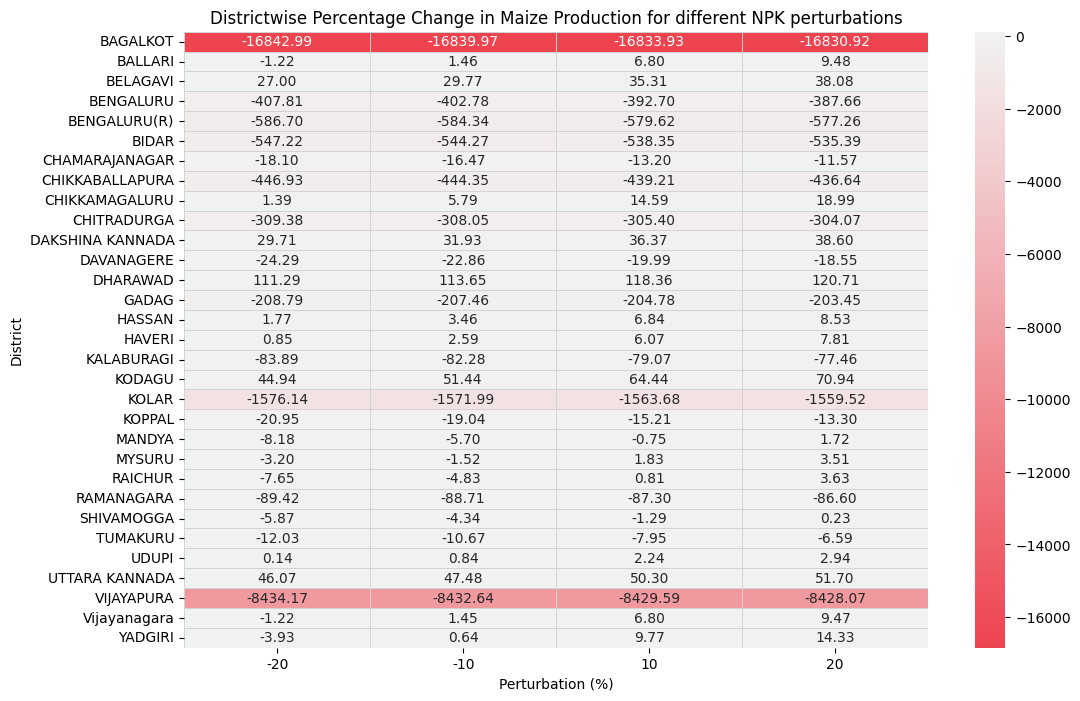

In [ ]:

def plot_heatmap(impact_df):
    cmap = sns.diverging_palette(10, 150, s=80, l=55, as_cmap=True)

    plt.figure(figsize=(12, 8))
    sns.heatmap(impact_df, annot=True, fmt=".2f", cmap=cmap, center=0, linewidths=0.5, linecolor='lightgrey')
    plt.title('Districtwise Percentage Change in Maize Production for different NPK perturbations')
    plt.xlabel('Perturbation (%)')
    plt.ylabel('District')

    plt.show()

# Prepare data for heatmap
pivot_df = results_df.pivot(index="District", columns="Perturbation (%)", values="Percentage Change")
# Plot the heatmap
plot_heatmap(pivot_df)



**Outcome : District 'Bagalkot' and 'Vijaypura' were impacted negatively on perturbating NPK_Rice in presence of other factors.Production went down the most in these two.**

In [ ]:
# (b.)GRID PLOT ,31 DISTRICT GRID PLOT ANALYSIS

In [ ]:
# The plot_districtwise_results function visualizes the impact of perturbations on the specified capability vector (in this case, Rice Production) for each district.
# It generates a series of line plots, one for each district, showing how the percentage change in Rice Production varies with different perturbation percentages.

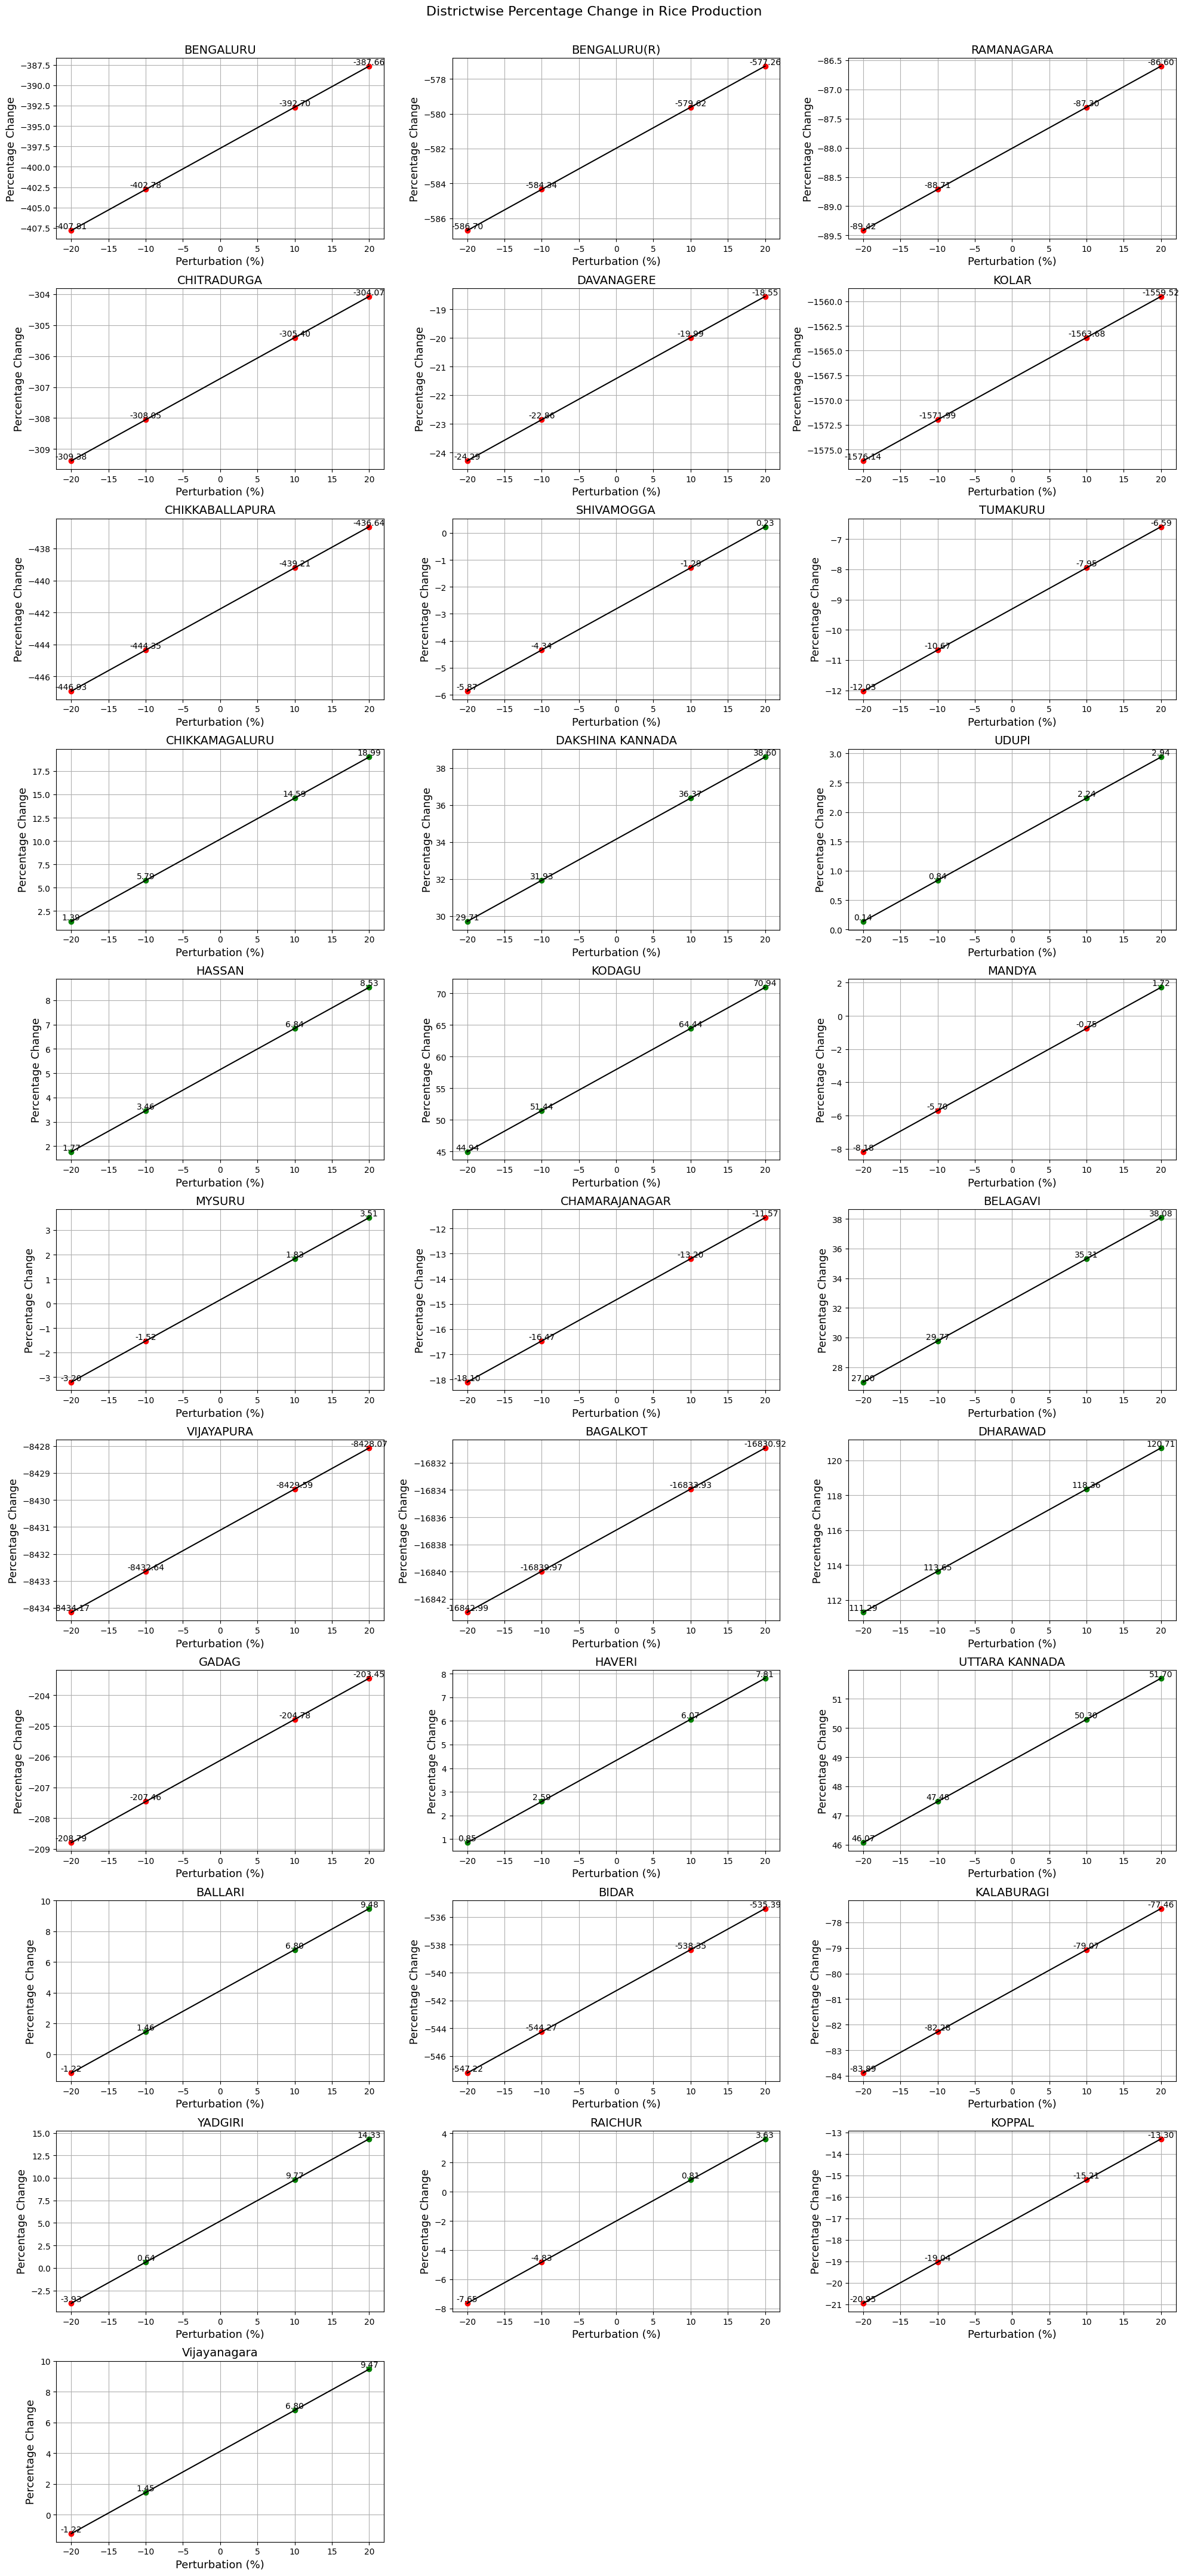

In [ ]:



def generate_colors(impacts):
    return ['green' if impact > 0 else 'red' for impact in impacts]

def plot_districtwise_results(results_df, user_perturbations):
    """
    Plot the impact of perturbations on the specified capability vector for each district in a single figure using seaborn line plots.

    Parameters:
    - results_df: DataFrame containing the analysis results including the district, perturbations, and their impacts.
    - user_perturbations: list, a list of perturbation percentages used in the analysis.
    """

    # Iterate over unique districts
    unique_districts = results_df['District'].unique()
    num_districts = len(unique_districts)

    # Define subplot layout
    num_cols = 3
    num_rows = (num_districts + num_cols - 1) // num_cols

    # Set figure size (reduce the height)
    plt.figure(figsize=(20, 4 * num_rows))

    # Iterate over districts
    for i, district in enumerate(unique_districts, start=1):
        plt.subplot(num_rows, num_cols, i)

        # Filter data for the current district
        district_data = results_df[results_df['District'] == district]

        # Plot each line separately with color coding
        for _, row in district_data.iterrows():
            if row['Percentage Change'] != 0:
                color = 'green' if row['Percentage Change'] > 0 else 'red'
                plt.plot(row['Perturbation (%)'], row['Percentage Change'], marker='o', color=color)
            elif row['Percentage Change'] == 0 or np.isnan(row['Percentage Change']):
                plt.axhline(y=0, color='black', linestyle='-')  # Plot a horizontal line at y=0

            # Show values of Percentage Change on the plot
            plt.text(row['Perturbation (%)'], row['Percentage Change'], f'{row["Percentage Change"]:.2f}', ha='center', va='bottom')

        # Connect the dots with a black line (excluding zero values)
        plt.plot(district_data[district_data['Percentage Change'] != 0]['Perturbation (%)'], district_data[district_data['Percentage Change'] != 0]['Percentage Change'], color='black')

        # Display gridlines
        plt.grid(True)

        # Set title and labels
        plt.title(f'{district}', fontsize=14)
        plt.xlabel('Perturbation (%)', fontsize=13)
        plt.ylabel('Percentage Change', fontsize=13)

    plt.tight_layout()
    plt.subplots_adjust(top=0.96)  # Adjust space between super title and subplots
    plt.suptitle(f'Districtwise Percentage Change in Rice Production', fontsize=16, y=0.98)  # Increase super title font size and adjust position

    plt.show()



plot_districtwise_results(results_df, user_perturbations)

**Outcome: All 31 districts can be studied together for better analysis**

In [ ]:
#(d.)Tableau Visulaisation

**For tableau Visualisation ,You have to download results_df into your local machine and save it as 'resultsRiceMLR.csv'**

In [ ]:
# Save the DataFrame to a CSV file in Google Colab
results_df.to_csv('resultsMaizeMLR.csv', index=False)

# Download the file to your local machine
from google.colab import files
files.download('resultsMaizeMLR.csv')